In [1]:
# Define the list of wards, number of scans and their respective probabilities, based on 90 days historical data
ward_list = ['A1', 'A10', 'A11', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'ALG', 'B10', 'B2', 'B5', 'B6', 'B8', 'B9', 'C10', 'C11', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'D5', 'D6', 'E10', 'E11', 'E2',
       'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'F10', 'F8', 'G1', 'G10',
       'G11', 'G2', 'G3', 'G4', 'G6', 'G7', 'G8', 'G9', 'H10', 'H2', 'H3',
       'H4', 'H5', 'H6', 'H7', 'H8', 'M5', 'R1', 'R10', 'R2', 'R7', 'R8',
       'R9']
ward_probs = [0.013306898753318324,0.010282603582109614,0.0029234853321684195,0.0018817836620854196,0.011559528209953292,
              0.021203669478141066,0.02930205988104439,0.03296481736617494,0.023555899055747842,0.028193151651601196,
              0.00396518700225142,0.006485432978258678,0.011693941328673678,0.011693941328673678,0.002285023018246581,
              0.02671460734567694,0.0004704459155213549,0.0038307738835310326,0.008804059276185355,0.008400819920024194,
              0.00010080983904029033,0.013609328270439194,0.029335663160724487,0.029436472999764776,0.026143351591115294,
              0.031150240263449713,0.031116636983769617,0.025101649921032292,0.00023522295776067745,0.027386672939278874,
              0.00023522295776067745,0.008367216640344097,0.002889882052488323,0.012870056117477066,0.018952249739574583,
              0.02671460734567694,0.03138546322121039,0.025941731913034713,0.020598810443899326,0.010887462616351356,
              0.0198259350112571,0.020733223562619713,0.001814577102725226,0.04304580127020397,0.01125709869283242,0.006115796901777613,
              0.010450619980510098,0.01323969219395813,0.020296380926778452,0.041466447125239426,0.012903659397157163,
              0.017675325111730904,0.014751839779562485,0.00033603279680096776,0.01293726267683726,0.016230384085486743,
              0.0037635673241708393,0.007997580563863033,0.03625793877482442,0.02375751873382842,0.00033603279680096776,
              0.00010080983904029033,3.360327968009678e-05,0.00010080983904029033,0.0167008300010081,0.015155079135723646,
              0.0007392721529621291]
# scan_options = [1,2,3,4,5,6,7,8]
# scan_probs = [0.9363303936330394, 0.061733706173370616, 0.0012547501254750125, 
#               0.00032265003226500323, 0.00014340001434000142, 0.00010755001075500108, 
#               7.170000717000071e-05, 3.5850003585000356e-05]

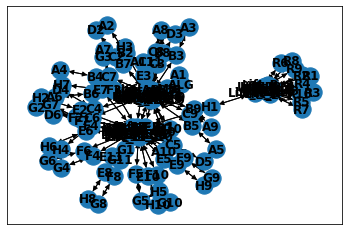

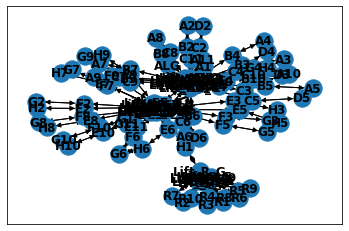

In [2]:
# imports
import json
import pandas as pd
import numpy as np
from ipynb.fs.full.two_partition import two_partition
from ipynb.fs.full.five_partition_simp import five_partition, three_partition
from ipynb.fs.full.four_partition import four_partition
import sys
sys.path.append('Codes_G11_Analytics_Avengers/')
from ACO_Static import aco_route_generation
import matplotlib.pyplot as plt

In [3]:
requests_hist = pd.DataFrame()

requests_hist['Ward'] = ward_list
requests_hist['Number of Scans'] = ward_probs

In [4]:
with open('points', 'r') as fp:
    points_full = json.load(fp)
with open('names', 'r') as fp:
    names_full = json.load(fp)

In [5]:
points = []
names = []

for i in ward_list:
    points.append(points_full[names_full.index(i)])
    names.append(i)

In [7]:
two_partition_res = two_partition(sorted(i[0] for i in points)[1], sorted(i[0] for i in points)[-2],
                                  sorted(i[1] for i in points)[1], sorted(i[1] for i in points)[-2], 
                                  0.005, points, ward_probs, 0.001)

In [8]:
two_partition_res

{'left_points': [[1.0, -7.971107899203981e-10],
  [0.9948693514077604, 0.10116832582751506],
  [0.9680771232941537, 0.25065254984082314],
  [0.9189578298029524, 0.3943558609417623],
  [0.8486442572035341, 0.5289640397285397],
  [0.7587581286643932, 0.6513724888836099],
  [0.6513724937224391, 0.758758123825564],
  [0.5289639849627243, 0.8486442523647049],
  [0.3943558061759469, 0.9189578249641231],
  [0.2506525546796523, 0.9680771184553245],
  [0.10116830831460256, 0.9948693465689312],
  [0.9884683490265576, 0.15142777421227496],
  [0.8978045586901752, 0.44039416055465386],
  [0.6121059671820772, 0.7907757123115754],
  [0.4853019139111668, 0.8743466095529985],
  [0.20129852319711297, 0.9795299124840477],
  [0.979529917322877, 0.20129851835828377],
  [0.9541392328208542, 0.2993631044821293],
  [0.29936316892560305, 0.954139227982025],
  [0.15142777905110416, 0.9884683441877283],
  [0.5712682026071417, 0.8207634646279649],
  [0.44039413559116075, 0.897804553851346],
  [-0.0506489271674617

In [9]:
left_points_2 = two_partition_res['left_points']
right_points_2 = two_partition_res['right_points']

In [10]:
left_points_nodes_2 = []
right_points_nodes_2 = []

for i in left_points_2:
    left_points_nodes_2.append(names[points.index(i)])
for i in right_points_2:
    right_points_nodes_2.append(names[points.index(i)])

In [11]:
left_points_nodes_2

['A1',
 'A10',
 'A11',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'B10',
 'B2',
 'B5',
 'B6',
 'B8',
 'C10',
 'C11',
 'C7',
 'C8',
 'D5',
 'D6',
 'F8',
 'G1',
 'G4',
 'G6',
 'G7',
 'G8',
 'G9',
 'M5',
 'R1',
 'R10',
 'R2',
 'R7',
 'R8',
 'R9']

In [12]:
right_points_nodes_2

['ALG',
 'B9',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C9',
 'E10',
 'E11',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'F10',
 'G10',
 'G11',
 'G2',
 'G3',
 'H10',
 'H2',
 'H3',
 'H4',
 'H5',
 'H6',
 'H7',
 'H8']

In [13]:
five_partition_res = five_partition(sorted(i[0] for i in points)[1], sorted(i[0] for i in points)[-2],
                                    sorted(i[1] for i in points)[1], sorted(i[1] for i in points)[-2],
                                    0.005, points, ward_probs, 0.005)

In [14]:
five_partition_res

{'left_points': [[-0.8978044910020939, 0.44039416055465386],
  [-0.9541392247374174, 0.2993631044821293],
  [-0.9884683409431207, 0.15142772950879155],
  [-0.8486441895154527, 0.5289640993331842],
  [-0.8743465467037463, 0.48530202828162666],
  [-0.8743466063083909, -0.48530191066655914],
  [-0.968077115210717, 0.2506525200385009],
  [-0.9189578217195156, 0.3943558609417623],
  [-0.9948693433243236, 0.10116825877228995],
  [-0.9999999919165631, -8.8219887010058e-08],
  [-0.9948692837196791, -0.10116843918044514],
  [-0.9189578217195156, -0.39435580293133926],
  [-0.8486442491200973, -0.5289639817181168]],
 'right_points': [[1.0, -7.971107899203981e-10],
  [0.9948693514077604, 0.10116832582751506],
  [0.9680771232941537, 0.25065254984082314],
  [0.9189578298029524, 0.3943558609417623],
  [0.8486442572035341, 0.5289640397285397],
  [0.7587581286643932, 0.6513724888836099],
  [0.6513724937224391, 0.758758123825564],
  [0.5289639849627243, 0.8486442523647049],
  [0.3943558061759469, 0.9189

In [15]:
left_points_5 = five_partition_res['left_points']
right_points_5 = five_partition_res['right_points']
top_points_5 = five_partition_res['top_points']

In [16]:
left_points_nodes_5 = []
right_points_nodes_5 = []
top_points_nodes_5 = []

for i in left_points_5:
    left_points_nodes_5.append(names[points.index(i)])
for i in right_points_5:
    right_points_nodes_5.append(names[points.index(i)])
for i in top_points_5:
    top_points_nodes_5.append(names[points.index(i)])

In [17]:
left_points_nodes_5

['E10',
 'E11',
 'E2',
 'E6',
 'E7',
 'E8',
 'G11',
 'H10',
 'H2',
 'H3',
 'H4',
 'H7',
 'H8']

In [18]:
top_points_nodes_5

['F8',
 'G1',
 'G10',
 'G2',
 'G3',
 'G4',
 'G6',
 'G7',
 'G8',
 'G9',
 'H5',
 'H6',
 'R1',
 'R10',
 'R2']

In [19]:
right_rewards_5 = []

for i in right_points_nodes_5:
    right_rewards_5.append(ward_probs[ward_list.index(i)])

In [20]:
right_points_5

[[1.0, -7.971107899203981e-10],
 [0.9948693514077604, 0.10116832582751506],
 [0.9680771232941537, 0.25065254984082314],
 [0.9189578298029524, 0.3943558609417623],
 [0.8486442572035341, 0.5289640397285397],
 [0.7587581286643932, 0.6513724888836099],
 [0.6513724937224391, 0.758758123825564],
 [0.5289639849627243, 0.8486442523647049],
 [0.3943558061759469, 0.9189578249641231],
 [0.2506525546796523, 0.9680771184553245],
 [0.10116830831460256, 0.9948693465689312],
 [-0.05064922146539418, 0.9987165283504096],
 [0.9884683490265576, 0.15142777421227496],
 [0.8978045586901752, 0.44039416055465386],
 [0.6121059671820772, 0.7907757123115754],
 [0.4853019139111668, 0.8743466095529985],
 [0.20129852319711297, 0.9795299124840477],
 [0.05064914014186421, 0.9987165283504096],
 [0.979529917322877, 0.20129851835828377],
 [0.9541392328208542, 0.2993631044821293],
 [-0.571268313732994, 0.8207634050233203],
 [-0.6121060783079295, 0.7907756527069308],
 [-0.6889669826908829, 0.7247927151608101],
 [-0.7587580

In [21]:
five_partition_res2 = three_partition(sorted(i[0] for i in right_points_5)[1],
                                      sorted(i[0] for i in right_points_5)[-2],
                                      sorted(i[1] for i in right_points_5)[1], 
                                      sorted(i[1] for i in right_points_5)[-2],
                                      0.005, right_points_5, right_rewards_5, 0.005)

In [22]:
five_partition_res2

{'left_points': [[0.3943558061759469, 0.9189578249641231],
  [0.2506525546796523, 0.9680771184553245],
  [0.10116830831460256, 0.9948693465689312],
  [-0.05064922146539418, 0.9987165283504096],
  [0.20129852319711297, 0.9795299124840477],
  [0.05064914014186421, 0.9987165283504096],
  [-0.571268313732994, 0.8207634050233203],
  [-0.6121060783079295, 0.7907756527069308],
  [0.29936316892560305, 0.954139227982025],
  [0.15142777905110416, 0.9884683441877283],
  [-3.9669669696933026e-08, 0.9999999951611707],
  [0.44039413559116075, 0.897804553851346]],
 'right_points': [[1.0, -7.971107899203981e-10],
  [0.9948693514077604, 0.10116832582751506],
  [0.9680771232941537, 0.25065254984082314],
  [0.9189578298029524, 0.3943558609417623],
  [0.8486442572035341, 0.5289640397285397],
  [0.7587581286643932, 0.6513724888836099],
  [0.6513724937224391, 0.758758123825564],
  [0.5289639849627243, 0.8486442523647049],
  [0.9884683490265576, 0.15142777421227496],
  [0.8978045586901752, 0.4403941605546538

In [23]:
right1_points_5 = five_partition_res2['left_points']
right2_points_5 = five_partition_res2['right_points']
right3_points_5 = five_partition_res2['top_points']

In [24]:
right1_points_nodes_5 = []
right2_points_nodes_5 = []
right3_points_nodes_5 = []

for i in right1_points_5:
    right1_points_nodes_5.append(names[points.index(i)])
for i in right2_points_5:
    right2_points_nodes_5.append(names[points.index(i)])
for i in right3_points_5:
    right3_points_nodes_5.append(names[points.index(i)])

In [25]:
right1_points_nodes_5

['A7', 'A8', 'A9', 'ALG', 'B8', 'B9', 'C2', 'C3', 'C7', 'C8', 'C9', 'D6']

In [26]:
right2_points_nodes_5

['A1',
 'A10',
 'A11',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'B10',
 'B2',
 'B5',
 'B6',
 'C10',
 'C11',
 'D5',
 'M5',
 'R9']

In [27]:
right3_points_nodes_5

['C4', 'C5', 'C6', 'E3', 'E4', 'E5', 'E9', 'F10', 'R7', 'R8']

In [28]:
four_partition_res = four_partition(sorted(i[0] for i in points)[1], sorted(i[0] for i in points)[-2],
                                    sorted(i[1] for i in points)[1], sorted(i[1] for i in points)[-2],
                                    0.005, points, ward_probs, 0.005)

In [29]:
four_partition_res

{'left_points': [[-0.8207634017787128, 0.5712683169776016],
  [-0.8978044910020939, 0.44039416055465386],
  [-0.9541392247374174, 0.2993631044821293],
  [-0.9884683409431207, 0.15142772950879155],
  [-0.7907756494623233, 0.6121060815525371],
  [-0.8486441895154527, 0.5289640993331842],
  [-0.8743465467037463, 0.48530202828162666],
  [-0.8743466063083909, -0.48530191066655914],
  [-0.968077115210717, 0.2506525200385009],
  [-0.9189578217195156, 0.3943558609417623],
  [-0.9948693433243236, 0.10116825877228995],
  [-0.9999999919165631, -8.8219887010058e-08],
  [-0.9948692837196791, -0.10116843918044514],
  [-0.9795299688440847, -0.20129843054553853],
  [-0.954139284342062, -0.29936304647170636],
  [-0.9189578217195156, -0.39435580293133926]],
 'right_points': [[1.0, -7.971107899203981e-10],
  [0.9948693514077604, 0.10116832582751506],
  [0.9680771232941537, 0.25065254984082314],
  [0.9189578298029524, 0.3943558609417623],
  [0.8486442572035341, 0.5289640397285397],
  [0.7587581286643932, 

In [30]:
left_points_4 = four_partition_res['left_points']
right_points_4 = four_partition_res['right_points']
top_points_4 = four_partition_res['top_points']

In [31]:
left_points_nodes_4 = []
right_points_nodes_4 = []
top_points_nodes_4 = []

for i in left_points_4:
    left_points_nodes_4.append(names[points.index(i)])
for i in right_points_4:
    right_points_nodes_4.append(names[points.index(i)])
for i in top_points_4:
    top_points_nodes_4.append(names[points.index(i)])

In [32]:
left_points_nodes_4

['C6',
 'E10',
 'E11',
 'E2',
 'E5',
 'E6',
 'E7',
 'E8',
 'G11',
 'H10',
 'H2',
 'H3',
 'H4',
 'H5',
 'H6',
 'H7']

In [33]:
top_points_nodes_4

['E9',
 'F10',
 'F8',
 'G1',
 'G10',
 'G2',
 'G3',
 'G4',
 'G6',
 'G7',
 'G8',
 'G9',
 'H8',
 'R1',
 'R10',
 'R2',
 'R7']

In [34]:
right_rewards_4 = []

for i in right_points_nodes_4:
    right_rewards_4.append(ward_probs[ward_list.index(i)])

In [35]:
four_partition_res2 = two_partition(sorted(i[0] for i in right_points_4)[1], 
                                    sorted(i[0] for i in right_points_4)[-2],
                                    sorted(i[1] for i in right_points_4)[1],
                                    sorted(i[1] for i in right_points_4)[-2],
                                    0.005, right_points_4, right_rewards_4, 0.005)

In [36]:
four_partition_res2

{'left_points': [[0.8486442572035341, 0.5289640397285397],
  [0.7587581286643932, 0.6513724888836099],
  [0.6513724937224391, 0.758758123825564],
  [0.5289639849627243, 0.8486442523647049],
  [0.3943558061759469, 0.9189578249641231],
  [0.2506525546796523, 0.9680771184553245],
  [0.8978045586901752, 0.44039416055465386],
  [0.6121059671820772, 0.7907757123115754],
  [0.4853019139111668, 0.8743466095529985],
  [0.20129852319711297, 0.9795299124840477],
  [0.29936316892560305, 0.954139227982025],
  [0.5712682026071417, 0.8207634646279649],
  [0.44039413559116075, 0.897804553851346]],
 'right_points': [[1.0, -7.971107899203981e-10],
  [0.9948693514077604, 0.10116832582751506],
  [0.9680771232941537, 0.25065254984082314],
  [0.9189578298029524, 0.3943558609417623],
  [0.10116830831460256, 0.9948693465689312],
  [-0.05064922146539418, 0.9987165283504096],
  [0.9884683490265576, 0.15142777421227496],
  [0.05064914014186421, 0.9987165283504096],
  [0.979529917322877, 0.20129851835828377],
  [

In [37]:
right1_points_4 = four_partition_res2['left_points']
right2_points_4 = four_partition_res2['right_points']

In [38]:
right1_points_nodes_4 = []
right2_points_nodes_4 = []

for i in right1_points_4:
    right1_points_nodes_4.append(names[points.index(i)])
for i in right2_points_4:
    right2_points_nodes_4.append(names[points.index(i)])

In [39]:
right1_points_nodes_4

['A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'B2', 'B5', 'B6', 'B8', 'C7', 'D5', 'D6']

In [40]:
right2_points_nodes_4

['A1',
 'A10',
 'A11',
 'A2',
 'A9',
 'ALG',
 'B10',
 'B9',
 'C10',
 'C11',
 'C2',
 'C3',
 'C4',
 'C5',
 'C8',
 'C9',
 'E3',
 'E4',
 'M5',
 'R8',
 'R9']

# simulation function

In [41]:
def simulation2_oneday(left_points_nodes_2, right_points_nodes_2, left_points_nodes_4, 
                       top_points_nodes_4, right1_points_nodes_4, right2_points_nodes_4, 
                       left_points_nodes_5, top_points_nodes_5, right1_points_nodes_5, 
                       right2_points_nodes_5, right3_points_nodes_5, night_unfulfilled, 
                       morning_filename, afternoon_filename, evening_filename, night_filename):
    # pre-divided regions
#     left_points_nodes_2 = ['A1', 'A10', 'A11', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B10',
#                            'B2', 'B5', 'B6', 'B8', 'C10', 'C11', 'C7', 'C8', 'D5', 'D6', 'F8', 'G1', 
#                            'G4', 'G6', 'G7', 'G8', 'G9', 'M5', 'R1', 'R10', 'R2', 'R7', 'R8', 'R9']
#     right_points_nodes_2 = ['ALG', 'B9', 'C2', 'C3', 'C4', 'C5', 'C6', 'C9', 'E10', 'E11', 'E2', 'E3',
#                             'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'F10', 'G10', 'G11', 'G2', 'G3', 'H10',
#                             'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8']
#     left_points_nodes_4 = ['C6', 'E10', 'E11', 'E2', 'E5', 'E6', 'E7', 'E8', 'G11', 'H10', 'H2', 'H3',
#                            'H4', 'H5', 'H6', 'H7']
#     top_points_nodes_4 = ['E9', 'F10', 'F8', 'G1', 'G10', 'G2', 'G3', 'G4', 'G6', 'G7', 'G8', 'G9',
#                           'H8', 'R1', 'R10', 'R2', 'R7']
#     right1_points_nodes_4 = ['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'B2', 'B5', 'B6', 'B8', 'C7',
#                              'D5', 'D6']
#     right2_points_nodes_4 = ['A1', 'A10', 'A11', 'A9', 'ALG', 'B10', 'B9', 'C10', 'C11', 'C2', 'C3',
#                              'C4', 'C5', 'C8', 'C9', 'E3', 'E4', 'M5', 'R8', 'R9']
#     left_points_nodes_5 = ['E10', 'E11', 'E2', 'E6', 'E7', 'E8', 'G11', 'H10', 'H2', 'H3', 'H4', 'H7', 'H8']
#     top_points_nodes_5 = ['F8', 'G1', 'G10', 'G2', 'G3', 'G4', 'G6', 'G7', 'G8', 'G9', 'H5', 
#                           'H6', 'R1', 'R10', 'R2']
#     right1_points_nodes_5 = ['A7', 'A8', 'A9', 'ALG', 'B8', 'B9', 'C2', 'C3', 'C7', 'C8', 'C9', 'D6']
#     right2_points_nodes_5 = ['A1', 'A10', 'A11', 'A2', 'A3', 'A4', 'A5', 'A6', 'B10', 'B2', 
#                              'B5', 'B6', 'C10', 'C11', 'D5', 'M5', 'R9']
#     right3_points_nodes_5 = ['C4', 'C5', 'C6', 'E3', 'E4', 'E5', 'E9', 'F10', 'R7', 'R8']
    
    # parameters
    morning_region1_requests = 0
    morning_region2_requests = 0
    morning_region3_requests = 0
    morning_region4_requests = 0
    afternoon_region1_requests = 0
    afternoon_region2_requests = 0
    afternoon_region3_requests = 0
    afternoon_region4_requests = 0
    afternoon_region5_requests = 0
    evening_region1_requests = 0
    evening_region2_requests = 0
    
    # parameters2
    morning_region1_fulfilled = 0
    morning_region2_fulfilled = 0
    morning_region3_fulfilled = 0
    morning_region4_fulfilled = 0
    afternoon_region1_fulfilled = 0
    afternoon_region2_fulfilled = 0
    afternoon_region3_fulfilled = 0
    afternoon_region4_fulfilled = 0
    afternoon_region5_fulfilled = 0
    evening_region1_fulfilled = 0
    evening_region2_fulfilled = 0
    
    # morning requests
    morning_temp = pd.read_csv(morning_filename)
    morning_temp = morning_temp.drop(columns = ['Is_Urgent'])
    morning_temp2 = pd.concat([night_unfulfilled, morning_temp])
    morning = morning_temp2.groupby('Ward', as_index = False)['Number of Scans'].sum()
    
    four_partition_region1 = pd.DataFrame(columns = ['Ward', 'Number of Scans'])
    four_partition_region2 = pd.DataFrame(columns = ['Ward', 'Number of Scans'])
    four_partition_region3 = pd.DataFrame(columns = ['Ward', 'Number of Scans'])
    four_partition_region4 = pd.DataFrame(columns = ['Ward', 'Number of Scans'])
    
    for i in range(len(morning['Ward'])):
        try:
            left_points_nodes_4.index(morning.iloc[i, 0])
            four_partition_region1.loc[len(four_partition_region1.index)] = [morning.iloc[i, 0], morning.iloc[i, 1]]
        except:
            try:
                top_points_nodes_4.index(morning.iloc[i, 0])
                four_partition_region2.loc[len(four_partition_region2.index)] = [morning.iloc[i, 0], morning.iloc[i, 1]]
            except:
                try:
                    right1_points_nodes_4.index(morning.iloc[i, 0])
                    four_partition_region3.loc[len(four_partition_region3.index)] = [morning.iloc[i, 0], morning.iloc[i, 1]]
                except:
                    four_partition_region4.loc[len(four_partition_region4.index)] = [morning.iloc[i, 0], morning.iloc[i, 1]]
            
    four_partition_region1.to_csv('morning/four_partition_region1.csv')
    four_partition_region2.to_csv('morning/four_partition_region2.csv')
    four_partition_region3.to_csv('morning/four_partition_region3.csv')
    four_partition_region4.to_csv('morning/four_partition_region4.csv')
    
    morning_region1_requests = four_partition_region1['Number of Scans'].sum()
    morning_region2_requests = four_partition_region2['Number of Scans'].sum()
    morning_region3_requests = four_partition_region3['Number of Scans'].sum()
    morning_region4_requests = four_partition_region4['Number of Scans'].sum()
    
    solution1 = aco_route_generation(request_filename = 'morning/four_partition_region1.csv', 
                                 vehicle_depot = ['H1'], 
                                 capacities = [120],
                                 time_per_demand = 2,
                                 allowed_ot = 15)
    solution2 = aco_route_generation(request_filename = 'morning/four_partition_region2.csv', 
                                 vehicle_depot = ['H1'], 
                                 capacities = [120],
                                 time_per_demand = 2,
                                 allowed_ot = 15)
    solution3 = aco_route_generation(request_filename = 'morning/four_partition_region3.csv', 
                                 vehicle_depot = ['H1'], 
                                 capacities = [120],
                                 time_per_demand = 2,
                                 allowed_ot = 15)
    solution4 = aco_route_generation(request_filename = 'morning/four_partition_region4.csv', 
                                 vehicle_depot = ['H1'], 
                                 capacities = [120],
                                 time_per_demand = 2,
                                 allowed_ot = 15)

    for i in solution1['routes'][0]:
        morning_region1_fulfilled += four_partition_region1.loc[four_partition_region1['Ward'] == i, 'Number of Scans'].values[0]
    for i in solution2['routes'][0]:
        morning_region2_fulfilled += four_partition_region2.loc[four_partition_region2['Ward'] == i, 'Number of Scans'].values[0]
    for i in solution3['routes'][0]:
        morning_region3_fulfilled += four_partition_region3.loc[four_partition_region3['Ward'] == i, 'Number of Scans'].values[0]
    for i in solution4['routes'][0]:
        morning_region4_fulfilled += four_partition_region4.loc[four_partition_region4['Ward'] == i, 'Number of Scans'].values[0]
        
    morning_fulfilled = solution1['routes'][0] + solution2['routes'][0] + solution3['routes'][0] + solution4['routes'][0]
    
    morning_unfulfilled = morning.copy()
    for i in morning_fulfilled:
        morning_unfulfilled.drop(morning_unfulfilled[morning_unfulfilled['Ward'] == i].index, inplace = True)
    morning_unfulfilled.reset_index(drop = True, inplace = True)
    
    # afternoon requests
    afternoon_temp = pd.read_csv(afternoon_filename)
    afternoon_temp = afternoon_temp.drop(columns = ['Is_Urgent'])
    afternoon_temp2 = pd.concat([morning_unfulfilled, afternoon_temp])
    afternoon = afternoon_temp2.groupby('Ward', as_index = False)['Number of Scans'].sum()
    
    five_partition_region1 = pd.DataFrame(columns = ['Ward', 'Number of Scans'])
    five_partition_region2 = pd.DataFrame(columns = ['Ward', 'Number of Scans'])
    five_partition_region3 = pd.DataFrame(columns = ['Ward', 'Number of Scans'])
    five_partition_region4 = pd.DataFrame(columns = ['Ward', 'Number of Scans'])
    five_partition_region5 = pd.DataFrame(columns = ['Ward', 'Number of Scans'])
    
    for i in range(len(afternoon['Ward'])):
        try:
            left_points_nodes_5.index(afternoon.iloc[i, 0])
            five_partition_region1.loc[len(five_partition_region1.index)] = [afternoon.iloc[i, 0], afternoon.iloc[i, 1]]
        except:
            try:
                top_points_nodes_5.index(afternoon.iloc[i, 0])
                five_partition_region2.loc[len(five_partition_region2.index)] = [afternoon.iloc[i, 0], afternoon.iloc[i, 1]]
            except:
                try:
                    right1_points_nodes_5.index(afternoon.iloc[i, 0])
                    five_partition_region3.loc[len(five_partition_region3.index)] = [afternoon.iloc[i, 0], afternoon.iloc[i, 1]]
                except:
                    try:
                        right2_points_nodes_5.index(afternoon.iloc[i, 0])
                        five_partition_region4.loc[len(five_partition_region4.index)] = [afternoon.iloc[i, 0], afternoon.iloc[i, 1]]
                    except:
                        five_partition_region5.loc[len(five_partition_region5.index)] = [afternoon.iloc[i, 0], afternoon.iloc[i, 1]]
    
    five_partition_region1.to_csv('afternoon/five_partition_region1.csv')
    five_partition_region2.to_csv('afternoon/five_partition_region2.csv')
    five_partition_region3.to_csv('afternoon/five_partition_region3.csv')
    five_partition_region4.to_csv('afternoon/five_partition_region4.csv')
    five_partition_region5.to_csv('afternoon/five_partition_region5.csv')
    
    afternoon_region1_requests = five_partition_region1['Number of Scans'].sum()
    afternoon_region2_requests = five_partition_region2['Number of Scans'].sum()
    afternoon_region3_requests = five_partition_region3['Number of Scans'].sum()
    afternoon_region4_requests = five_partition_region4['Number of Scans'].sum()
    afternoon_region5_requests = five_partition_region5['Number of Scans'].sum()
    
    solution1 = aco_route_generation(request_filename = 'afternoon/five_partition_region1.csv', 
                                 vehicle_depot = ['H1'], 
                                 capacities = [120],
                                 time_per_demand = 2,
                                 allowed_ot = 15)
    solution2 = aco_route_generation(request_filename = 'afternoon/five_partition_region2.csv', 
                                 vehicle_depot = ['H1'], 
                                 capacities = [120],
                                 time_per_demand = 2,
                                 allowed_ot = 15)
    solution3 = aco_route_generation(request_filename = 'afternoon/five_partition_region3.csv', 
                                 vehicle_depot = ['H1'], 
                                 capacities = [120],
                                 time_per_demand = 2,
                                 allowed_ot = 15)
    solution4 = aco_route_generation(request_filename = 'afternoon/five_partition_region4.csv', 
                                 vehicle_depot = ['H1'], 
                                 capacities = [120],
                                 time_per_demand = 2,
                                 allowed_ot = 15)
    solution5 = aco_route_generation(request_filename = 'afternoon/five_partition_region5.csv', 
                                 vehicle_depot = ['H1'], 
                                 capacities = [120],
                                 time_per_demand = 2,
                                 allowed_ot = 15)
    
    for i in solution1['routes'][0]:
        afternoon_region1_fulfilled += five_partition_region1.loc[five_partition_region1['Ward'] == i, 'Number of Scans'].values[0]
    for i in solution2['routes'][0]:
        afternoon_region2_fulfilled += five_partition_region2.loc[five_partition_region2['Ward'] == i, 'Number of Scans'].values[0]
    for i in solution3['routes'][0]:
        afternoon_region3_fulfilled += five_partition_region3.loc[five_partition_region3['Ward'] == i, 'Number of Scans'].values[0]
    for i in solution4['routes'][0]:
        afternoon_region4_fulfilled += five_partition_region4.loc[five_partition_region4['Ward'] == i, 'Number of Scans'].values[0]
    for i in solution5['routes'][0]:
        afternoon_region5_fulfilled += five_partition_region5.loc[five_partition_region5['Ward'] == i, 'Number of Scans'].values[0]
    
    afternoon_fulfilled = solution1['routes'][0] + solution2['routes'][0] + solution3['routes'][0] + solution4['routes'][0] + solution5['routes'][0]

    afternoon_unfulfilled = afternoon.copy()
    for i in afternoon_fulfilled:
        afternoon_unfulfilled.drop(afternoon_unfulfilled[afternoon_unfulfilled['Ward'] ==i].index, inplace = True)
    afternoon_unfulfilled.reset_index(drop = True, inplace = True)
    
    # evening requests
    evening_temp = pd.read_csv(evening_filename)
    evening_temp = evening_temp.drop(columns = ['Is_Urgent'])
    evening_temp2 = pd.concat([afternoon_unfulfilled, evening_temp])
    evening = evening_temp2.groupby('Ward', as_index = False)['Number of Scans'].sum()
    
    two_partition_region1 = pd.DataFrame(columns = ['Ward', 'Number of Scans'])
    two_partition_region2 = pd.DataFrame(columns = ['Ward', 'Number of Scans'])
    
    for i in range(len(evening['Ward'])):
        try:
            left_points_nodes_2.index(evening.iloc[i, 0])
            two_partition_region1.loc[len(two_partition_region1.index)] = [evening.iloc[i, 0], evening.iloc[i, 1]]
        except:
            two_partition_region2.loc[len(two_partition_region2.index)] = [evening.iloc[i, 0], evening.iloc[i, 1]]
    
    two_partition_region1.to_csv('evening/two_partition_region1.csv')
    two_partition_region2.to_csv('evening/two_partition_region2.csv')
    
    evening_region1_requests = two_partition_region1['Number of Scans'].sum()
    evening_region2_requests = two_partition_region2['Number of Scans'].sum()
    
    solution1 = aco_route_generation(request_filename = 'evening/two_partition_region1.csv', 
                                 vehicle_depot = ['H1'], 
                                 capacities = [120],
                                 time_per_demand = 2,
                                 allowed_ot = 15)
    solution2 = aco_route_generation(request_filename = 'evening/two_partition_region2.csv', 
                                 vehicle_depot = ['H1'], 
                                 capacities = [120],
                                 time_per_demand = 2,
                                 allowed_ot = 15)
    
    for i in solution1['routes'][0]:
        evening_region1_fulfilled += two_partition_region1.loc[two_partition_region1['Ward'] == i, 'Number of Scans'].values[0]
    for i in solution2['routes'][0]:
        evening_region2_fulfilled += two_partition_region2.loc[two_partition_region2['Ward'] == i, 'Number of Scans'].values[0]
    
    evening_fulfilled = solution1['routes'][0] + solution2['routes'][0]

    evening_unfulfilled = evening.copy()
    for i in evening_fulfilled:
        evening_unfulfilled.drop(evening_unfulfilled[evening_unfulfilled['Ward'] ==i].index, inplace = True)
    evening_unfulfilled.reset_index(drop = True, inplace = True)
    
    # night requests
    night_temp = pd.read_csv(night_filename)
    night_temp = night_temp.drop(columns = ['Is_Urgent'])
    night_temp2 = pd.concat([evening_unfulfilled, night_temp])
    night = night_temp2.groupby('Ward', as_index = False)['Number of Scans'].sum()
    
    night.to_csv('night/night.csv')
    
    solution = aco_route_generation(request_filename = 'night/night.csv', 
                                 vehicle_depot = ['H1'], 
                                 capacities = [120],
                                 time_per_demand = 2,
                                 allowed_ot = 15)
    
    night_fulfilled = solution['routes'][0]
    
    night_unfulfilled = night.copy()
    for i in night_fulfilled:
        night_unfulfilled.drop(night_unfulfilled[night_unfulfilled['Ward'] ==i].index, inplace = True)
    night_unfulfilled.reset_index(drop = True, inplace = True)
    
    morning_total = morning['Number of Scans'].sum()
    afternoon_total = afternoon['Number of Scans'].sum()
    evening_total = evening['Number of Scans'].sum()
    night_total = night['Number of Scans'].sum()
    
    return morning_fulfilled, morning_unfulfilled, afternoon_fulfilled, afternoon_unfulfilled, \
    evening_fulfilled, evening_unfulfilled, night_fulfilled, night_unfulfilled, morning_total, \
    afternoon_total, evening_total, night_total, morning, afternoon, evening, night, \
    morning_region1_requests, morning_region2_requests, morning_region3_requests, \
    morning_region4_requests, afternoon_region1_requests, afternoon_region2_requests, \
    afternoon_region3_requests, afternoon_region4_requests, afternoon_region5_requests, \
    evening_region1_requests, evening_region2_requests, morning_region1_fulfilled, \
    morning_region2_fulfilled, morning_region3_fulfilled, morning_region4_fulfilled, \
    afternoon_region1_fulfilled, afternoon_region2_fulfilled, afternoon_region3_fulfilled, \
    afternoon_region4_fulfilled, afternoon_region5_fulfilled, evening_region1_fulfilled, \
    evening_region2_fulfilled

# visualize ward requests based on request probability - preparation

In [42]:
ward_q1 = []
ward_q2 = []
ward_q3 = []
ward_q4 = []

q1 = np.percentile(ward_probs, 25)
q2 = np.percentile(ward_probs, 50)
q3 = np.percentile(ward_probs, 75)

for i in range(len(ward_probs)):
    if ward_probs[i] <= q1:
        ward_q1.append(ward_list[i])
    elif ward_probs[i] <= q2:
        ward_q2.append(ward_list[i])
    elif ward_probs[i] <= q3:
        ward_q3.append(ward_list[i])
    else:
        ward_q4.append(ward_list[i])

# simulation

In [43]:
morning_request_number = []
afternoon_request_number = []
evening_request_number = []
night_request_number = []

morning_unfulfilled_number = []
afternoon_unfulfilled_number = []
evening_unfulfilled_number = []
night_unfulfilled_number = []

q1_morning_request = {}
q1_afternoon_request = {}
q1_evening_request = {}
q1_night_request = {}

q2_morning_request = {}
q2_afternoon_request = {}
q2_evening_request = {}
q2_night_request = {}

q3_morning_request = {}
q3_afternoon_request = {}
q3_evening_request = {}
q3_night_request = {}

q4_morning_request = {}
q4_afternoon_request = {}
q4_evening_request = {}
q4_night_request = {}

q1_morning_unfulfilled = {}
q1_afternoon_unfulfilled = {}
q1_evening_unfulfilled = {}
q1_night_unfulfilled = {}

q2_morning_unfulfilled = {}
q2_afternoon_unfulfilled = {}
q2_evening_unfulfilled = {}
q2_night_unfulfilled = {}

q3_morning_unfulfilled = {}
q3_afternoon_unfulfilled = {}
q3_evening_unfulfilled = {}
q3_night_unfulfilled = {}

q4_morning_unfulfilled = {}
q4_afternoon_unfulfilled = {}
q4_evening_unfulfilled = {}
q4_night_unfulfilled = {}

morning_region1_total = {}
morning_region2_total = {}
morning_region3_total = {}
morning_region4_total = {}
morning_region1_fulfilled = {}
morning_region2_fulfilled = {}
morning_region3_fulfilled = {}
morning_region4_fulfilled = {}

afternoon_region1_total = {}
afternoon_region2_total = {}
afternoon_region3_total = {}
afternoon_region4_total = {}
afternoon_region5_total = {}
afternoon_region1_fulfilled = {}
afternoon_region2_fulfilled = {}
afternoon_region3_fulfilled = {}
afternoon_region4_fulfilled = {}
afternoon_region5_fulfilled = {}

evening_region1_total = {}
evening_region2_total = {}
evening_region1_fulfilled = {}
evening_region2_fulfilled = {}

night_region1_total = {}
night_region1_fulfilled = {}

In [44]:
import time

i = 1 # number of simulations

run_time = {}
night_unfulfilled = pd.DataFrame() # record unfulfilled requests left overnight

# 40 days simulation / record all 40 days
while i <= 40:
    start = time.time()
    
    morning_filename = f"simulated_agg_24hrs/my_csv_file_agg_24hrs_{4*i - 3}.csv"
    afternoon_filename = f"simulated_agg_24hrs/my_csv_file_agg_24hrs_{4*i - 2}.csv"
    evening_filename = f"simulated_agg_24hrs/my_csv_file_agg_24hrs_{4*i - 1}.csv"
    night_filename = f"simulated_agg_24hrs/my_csv_file_agg_24hrs_{4*i}.csv"
    
    sim = simulation2_oneday(left_points_nodes_2, right_points_nodes_2, left_points_nodes_4, 
                             top_points_nodes_4, right1_points_nodes_4, right2_points_nodes_4, 
                             left_points_nodes_5, top_points_nodes_5, right1_points_nodes_5, 
                             right2_points_nodes_5, right3_points_nodes_5, night_unfulfilled, 
                             morning_filename, afternoon_filename, evening_filename, night_filename)
    
    night_unfulfilled = sim[7]
    
    if i >= 0:
        morning_unfulfilled_number.append(sim[1]['Number of Scans'].sum())
        afternoon_unfulfilled_number.append(sim[3]['Number of Scans'].sum())
        evening_unfulfilled_number.append(sim[5]['Number of Scans'].sum())
        night_unfulfilled_number.append(sim[7]['Number of Scans'].sum())
        
        morning_request_number.append(sim[8])
        afternoon_request_number.append(sim[9])
        evening_request_number.append(sim[10])
        night_request_number.append(sim[11])
        
        # morning - by quantile
        df_morning_q1 = pd.DataFrame()
        df_morning_q2 = pd.DataFrame()
        df_morning_q3 = pd.DataFrame()
        df_morning_q4 = pd.DataFrame()
        for j in range(len(sim[12])):
            if (sim[12].iloc[j, 0] in ward_q1):
                df_morning_q1 = pd.concat([df_morning_q1, sim[12].iloc[j:j+1]])
            elif (sim[12].iloc[j, 0] in ward_q2):
                df_morning_q2 = pd.concat([df_morning_q2, sim[12].iloc[j:j+1]])
            elif (sim[12].iloc[j, 0] in ward_q3):
                df_morning_q3 = pd.concat([df_morning_q3, sim[12].iloc[j:j+1]])
            else:
                df_morning_q4 = pd.concat([df_morning_q4, sim[12].iloc[j:j+1]])
        df_morning_q1.reset_index(inplace = True, drop = True)
        df_morning_q2.reset_index(inplace = True, drop = True)
        df_morning_q3.reset_index(inplace = True, drop = True)
        df_morning_q4.reset_index(inplace = True, drop = True)
        q1_morning_request[i] = df_morning_q1
        q2_morning_request[i] = df_morning_q2
        q3_morning_request[i] = df_morning_q3
        q4_morning_request[i] = df_morning_q4
        
        # morning unfulfilled - by quantile
        df_morning_unfulfilled_q1 = pd.DataFrame()
        df_morning_unfulfilled_q2 = pd.DataFrame()
        df_morning_unfulfilled_q3 = pd.DataFrame()
        df_morning_unfulfilled_q4 = pd.DataFrame()
        for k in range(len(sim[1])):
            if (sim[1].iloc[k, 0] in ward_q1):
                df_morning_unfulfilled_q1 = pd.concat([df_morning_unfulfilled_q1, sim[1].iloc[k:k+1]])
            elif (sim[1].iloc[k, 0] in ward_q2):
                df_morning_unfulfilled_q2 = pd.concat([df_morning_unfulfilled_q2, sim[1].iloc[k:k+1]])
            elif (sim[1].iloc[k, 0] in ward_q3):
                df_morning_unfulfilled_q3 = pd.concat([df_morning_unfulfilled_q3, sim[1].iloc[k:k+1]])
            else:
                df_morning_unfulfilled_q4 = pd.concat([df_morning_unfulfilled_q4, sim[1].iloc[k:k+1]])
        df_morning_unfulfilled_q1.reset_index(inplace = True, drop = True)
        df_morning_unfulfilled_q2.reset_index(inplace = True, drop = True)
        df_morning_unfulfilled_q3.reset_index(inplace = True, drop = True)
        df_morning_unfulfilled_q4.reset_index(inplace = True, drop = True)
        q1_morning_unfulfilled[i] = df_morning_unfulfilled_q1
        q2_morning_unfulfilled[i] = df_morning_unfulfilled_q2
        q3_morning_unfulfilled[i] = df_morning_unfulfilled_q3
        q4_morning_unfulfilled[i] = df_morning_unfulfilled_q4
        
        # afternoon - by quantile
        df_afternoon_q1 = pd.DataFrame()
        df_afternoon_q2 = pd.DataFrame()
        df_afternoon_q3 = pd.DataFrame()
        df_afternoon_q4 = pd.DataFrame()
        for l in range(len(sim[13])):
            if (sim[13].iloc[l, 0] in ward_q1):
                df_afternoon_q1 = pd.concat([df_afternoon_q1, sim[13].iloc[l:l+1]])
            elif (sim[13].iloc[l, 0] in ward_q2):
                df_afternoon_q2 = pd.concat([df_afternoon_q2, sim[13].iloc[l:l+1]])
            elif (sim[13].iloc[l, 0] in ward_q3):
                df_afternoon_q3 = pd.concat([df_afternoon_q3, sim[13].iloc[l:l+1]])
            else:
                df_afternoon_q4 = pd.concat([df_afternoon_q4, sim[13].iloc[l:l+1]])
        df_afternoon_q1.reset_index(inplace = True, drop = True)
        df_afternoon_q2.reset_index(inplace = True, drop = True)
        df_afternoon_q3.reset_index(inplace = True, drop = True)
        df_afternoon_q4.reset_index(inplace = True, drop = True)
        q1_afternoon_request[i] = df_afternoon_q1
        q2_afternoon_request[i] = df_afternoon_q2
        q3_afternoon_request[i] = df_afternoon_q3
        q4_afternoon_request[i] = df_afternoon_q4
        
        # afternoon unfulfilled - by quantile
        df_afternoon_unfulfilled_q1 = pd.DataFrame()
        df_afternoon_unfulfilled_q2 = pd.DataFrame()
        df_afternoon_unfulfilled_q3 = pd.DataFrame()
        df_afternoon_unfulfilled_q4 = pd.DataFrame()
        for m in range(len(sim[3])):
            if (sim[3].iloc[m, 0] in ward_q1):
                df_afternoon_unfulfilled_q1 = pd.concat([df_afternoon_unfulfilled_q1, sim[3].iloc[m:m+1]])
            elif (sim[3].iloc[m, 0] in ward_q2):
                df_afternoon_unfulfilled_q2 = pd.concat([df_afternoon_unfulfilled_q2, sim[3].iloc[m:m+1]])
            elif (sim[3].iloc[m, 0] in ward_q3):
                df_afternoon_unfulfilled_q3 = pd.concat([df_afternoon_unfulfilled_q3, sim[3].iloc[m:m+1]])
            else:
                df_afternoon_unfulfilled_q4 = pd.concat([df_afternoon_unfulfilled_q4, sim[3].iloc[m:m+1]])
        df_afternoon_unfulfilled_q1.reset_index(inplace = True, drop = True)
        df_afternoon_unfulfilled_q2.reset_index(inplace = True, drop = True)
        df_afternoon_unfulfilled_q3.reset_index(inplace = True, drop = True)
        df_afternoon_unfulfilled_q4.reset_index(inplace = True, drop = True)
        q1_afternoon_unfulfilled[i] = df_afternoon_unfulfilled_q1
        q2_afternoon_unfulfilled[i] = df_afternoon_unfulfilled_q2
        q3_afternoon_unfulfilled[i] = df_afternoon_unfulfilled_q3
        q4_afternoon_unfulfilled[i] = df_afternoon_unfulfilled_q4
        
        # evening - by quantile
        df_evening_q1 = pd.DataFrame()
        df_evening_q2 = pd.DataFrame()
        df_evening_q3 = pd.DataFrame()
        df_evening_q4 = pd.DataFrame()
        for n in range(len(sim[14])):
            if (sim[14].iloc[n, 0] in ward_q1):
                df_evening_q1 = pd.concat([df_evening_q1, sim[14].iloc[n:n+1]])
            elif (sim[14].iloc[n, 0] in ward_q2):
                df_evening_q2 = pd.concat([df_evening_q2, sim[14].iloc[n:n+1]])
            elif (sim[14].iloc[n, 0] in ward_q3):
                df_evening_q3 = pd.concat([df_evening_q3, sim[14].iloc[n:n+1]])
            else:
                df_evening_q4 = pd.concat([df_evening_q4, sim[14].iloc[n:n+1]])
        df_evening_q1.reset_index(inplace = True, drop = True)
        df_evening_q2.reset_index(inplace = True, drop = True)
        df_evening_q3.reset_index(inplace = True, drop = True)
        df_evening_q4.reset_index(inplace = True, drop = True)
        q1_evening_request[i] = df_evening_q1
        q2_evening_request[i] = df_evening_q2
        q3_evening_request[i] = df_evening_q3
        q4_evening_request[i] = df_evening_q4
        
        # evening unfulfilled - by quantile
        df_evening_unfulfilled_q1 = pd.DataFrame()
        df_evening_unfulfilled_q2 = pd.DataFrame()
        df_evening_unfulfilled_q3 = pd.DataFrame()
        df_evening_unfulfilled_q4 = pd.DataFrame()
        for p in range(len(sim[5])):
            if (sim[5].iloc[p, 0] in ward_q1):
                df_evening_unfulfilled_q1 = pd.concat([df_evening_unfulfilled_q1, sim[5].iloc[p:p+1]])
            elif (sim[5].iloc[p, 0] in ward_q2):
                df_evening_unfulfilled_q2 = pd.concat([df_evening_unfulfilled_q2, sim[5].iloc[p:p+1]])
            elif (sim[5].iloc[p, 0] in ward_q3):
                df_evening_unfulfilled_q3 = pd.concat([df_evening_unfulfilled_q3, sim[5].iloc[p:p+1]])
            else:
                df_evening_unfulfilled_q4 = pd.concat([df_evening_unfulfilled_q4, sim[5].iloc[p:p+1]])
        df_evening_unfulfilled_q1.reset_index(inplace = True, drop = True)
        df_evening_unfulfilled_q2.reset_index(inplace = True, drop = True)
        df_evening_unfulfilled_q3.reset_index(inplace = True, drop = True)
        df_evening_unfulfilled_q4.reset_index(inplace = True, drop = True)
        q1_evening_unfulfilled[i] = df_evening_unfulfilled_q1
        q2_evening_unfulfilled[i] = df_evening_unfulfilled_q2
        q3_evening_unfulfilled[i] = df_evening_unfulfilled_q3
        q4_evening_unfulfilled[i] = df_evening_unfulfilled_q4
        
        # night - by quantile
        df_night_q1 = pd.DataFrame()
        df_night_q2 = pd.DataFrame()
        df_night_q3 = pd.DataFrame()
        df_night_q4 = pd.DataFrame()
        for n in range(len(sim[15])):
            if (sim[15].iloc[n, 0] in ward_q1):
                df_night_q1 = pd.concat([df_night_q1, sim[15].iloc[n:n+1]])
            elif (sim[15].iloc[n, 0] in ward_q2):
                df_night_q2 = pd.concat([df_night_q2, sim[15].iloc[n:n+1]])
            elif (sim[15].iloc[n, 0] in ward_q3):
                df_night_q3 = pd.concat([df_night_q3, sim[15].iloc[n:n+1]])
            else:
                df_night_q4 = pd.concat([df_night_q4, sim[15].iloc[n:n+1]])
        df_night_q1.reset_index(inplace = True, drop = True)
        df_night_q2.reset_index(inplace = True, drop = True)
        df_night_q3.reset_index(inplace = True, drop = True)
        df_night_q4.reset_index(inplace = True, drop = True)
        q1_night_request[i] = df_night_q1
        q2_night_request[i] = df_night_q2
        q3_night_request[i] = df_night_q3
        q4_night_request[i] = df_night_q4
        
        # night unfulfilled - by quantile
        df_night_unfulfilled_q1 = pd.DataFrame()
        df_night_unfulfilled_q2 = pd.DataFrame()
        df_night_unfulfilled_q3 = pd.DataFrame()
        df_night_unfulfilled_q4 = pd.DataFrame()
        for p in range(len(sim[7])):
            if (sim[7].iloc[p, 0] in ward_q1):
                df_night_unfulfilled_q1 = pd.concat([df_night_unfulfilled_q1, sim[7].iloc[p:p+1]])
            elif (sim[7].iloc[p, 0] in ward_q2):
                df_night_unfulfilled_q2 = pd.concat([df_night_unfulfilled_q2, sim[7].iloc[p:p+1]])
            elif (sim[7].iloc[p, 0] in ward_q3):
                df_night_unfulfilled_q3 = pd.concat([df_night_unfulfilled_q3, sim[7].iloc[p:p+1]])
            else:
                df_night_unfulfilled_q4 = pd.concat([df_night_unfulfilled_q4, sim[7].iloc[p:p+1]])
        df_night_unfulfilled_q1.reset_index(inplace = True, drop = True)
        df_night_unfulfilled_q2.reset_index(inplace = True, drop = True)
        df_night_unfulfilled_q3.reset_index(inplace = True, drop = True)
        df_night_unfulfilled_q4.reset_index(inplace = True, drop = True)
        q1_night_unfulfilled[i] = df_night_unfulfilled_q1
        q2_night_unfulfilled[i] = df_night_unfulfilled_q2
        q3_night_unfulfilled[i] = df_night_unfulfilled_q3
        q4_night_unfulfilled[i] = df_night_unfulfilled_q4
    
        # morning - by region
        morning_region1_total[i] = sim[16]
        morning_region2_total[i] = sim[17]
        morning_region3_total[i] = sim[18]
        morning_region4_total[i] = sim[19]
        # morning fulfilled - by region
        morning_region1_fulfilled[i] = sim[27]
        morning_region2_fulfilled[i] = sim[28]
        morning_region3_fulfilled[i] = sim[29]
        morning_region4_fulfilled[i] = sim[30]
        
        # afternoon - by region
        afternoon_region1_total[i] = sim[20]
        afternoon_region2_total[i] = sim[21]
        afternoon_region3_total[i] = sim[22]
        afternoon_region4_total[i] = sim[23]
        afternoon_region5_total[i] = sim[24]
        # afternoon fulfilled - by region
        afternoon_region1_fulfilled[i] = sim[31]
        afternoon_region2_fulfilled[i] = sim[32]
        afternoon_region3_fulfilled[i] = sim[33]
        afternoon_region4_fulfilled[i] = sim[34]
        afternoon_region5_fulfilled[i] = sim[35]
        
        # evening - by region
        evening_region1_total[i] = sim[25]
        evening_region2_total[i] = sim[26]
        # evening fulfilled - by region
        evening_region1_fulfilled[i] = sim[36]
        evening_region2_fulfilled[i] = sim[37]
        
        # night - by region
        night_region1_total[i] = sim[15]['Number of Scans'].sum()
        # night fulfilled - by region
        night_region1_fulfilled_temp = 0
        for q in sim[6]:
            night_region1_fulfilled_temp += sim[15].loc[sim[15]['Ward'] == q, 'Number of Scans'].values[0]
        night_region1_fulfilled[i] = night_region1_fulfilled_temp
        
    end = time.time()
    run_time[i] = end - start
        
    print(f"{i} days simulation finished")
    
    i += 1

1 days simulation finished
2 days simulation finished
3 days simulation finished
4 days simulation finished
5 days simulation finished
6 days simulation finished
7 days simulation finished
8 days simulation finished
9 days simulation finished
10 days simulation finished
11 days simulation finished
12 days simulation finished
13 days simulation finished
14 days simulation finished
15 days simulation finished
16 days simulation finished
17 days simulation finished
18 days simulation finished
19 days simulation finished
20 days simulation finished
21 days simulation finished
22 days simulation finished
23 days simulation finished
24 days simulation finished
25 days simulation finished
26 days simulation finished
27 days simulation finished
28 days simulation finished
29 days simulation finished
30 days simulation finished
31 days simulation finished
32 days simulation finished
33 days simulation finished
34 days simulation finished
35 days simulation finished
36 days simulation finished
3

# save data

In [45]:
import pickle

data_list = [morning_request_number, afternoon_request_number, evening_request_number, night_request_number,
             morning_unfulfilled_number, afternoon_unfulfilled_number, evening_unfulfilled_number,
             night_unfulfilled_number, q1_morning_request, q1_afternoon_request, q1_evening_request, 
             q1_night_request, q2_morning_request, q2_afternoon_request, q2_evening_request, q2_night_request,
             q3_morning_request, q3_afternoon_request, q3_evening_request, q3_night_request, q4_morning_request,
             q4_afternoon_request, q4_evening_request, q4_night_request, q1_morning_unfulfilled,
             q1_afternoon_unfulfilled, q1_evening_unfulfilled, q1_night_unfulfilled, q2_morning_unfulfilled,
             q2_afternoon_unfulfilled, q2_evening_unfulfilled, q2_night_unfulfilled, q3_morning_unfulfilled,
             q3_afternoon_unfulfilled, q3_evening_unfulfilled, q3_night_unfulfilled, q4_morning_unfulfilled,
             q4_afternoon_unfulfilled, q4_evening_unfulfilled, q4_night_unfulfilled, morning_region1_total,
             morning_region2_total, morning_region3_total, morning_region4_total, morning_region1_fulfilled,
             morning_region2_fulfilled, morning_region3_fulfilled, morning_region4_fulfilled,
             afternoon_region1_total, afternoon_region2_total, afternoon_region3_total, afternoon_region4_total,
             afternoon_region5_total, afternoon_region1_fulfilled, afternoon_region2_fulfilled,
             afternoon_region3_fulfilled, afternoon_region4_fulfilled, afternoon_region5_fulfilled,
             evening_region1_total, evening_region2_total, evening_region1_fulfilled, evening_region2_fulfilled,
             night_region1_total, night_region1_fulfilled]

data_name = ['morning_request_number', 'afternoon_request_number', 'evening_request_number', 
             'night_request_number','morning_unfulfilled_number', 'afternoon_unfulfilled_number',
             'evening_unfulfilled_number', 'night_unfulfilled_number', 'q1_morning_request',
             'q1_afternoon_request', 'q1_evening_request', 'q1_night_request', 'q2_morning_request', 
             'q2_afternoon_request', 'q2_evening_request', 'q2_night_request', 'q3_morning_request',
             'q3_afternoon_request', 'q3_evening_request', 'q3_night_request', 'q4_morning_request',
             'q4_afternoon_request', 'q4_evening_request', 'q4_night_request', 'q1_morning_unfulfilled',
             'q1_afternoon_unfulfilled', 'q1_evening_unfulfilled', 'q1_night_unfulfilled',
             'q2_morning_unfulfilled', 'q2_afternoon_unfulfilled', 'q2_evening_unfulfilled',
             'q2_night_unfulfilled', 'q3_morning_unfulfilled', 'q3_afternoon_unfulfilled',
             'q3_evening_unfulfilled', 'q3_night_unfulfilled', 'q4_morning_unfulfilled', 
             'q4_afternoon_unfulfilled', 'q4_evening_unfulfilled', 'q4_night_unfulfilled',
             'morning_region1_total', 'morning_region2_total', 'morning_region3_total',
             'morning_region4_total', 'morning_region1_fulfilled', 'morning_region2_fulfilled',
             'morning_region3_fulfilled', 'morning_region4_fulfilled', 'afternoon_region1_total',
             'afternoon_region2_total', 'afternoon_region3_total', 'afternoon_region4_total',
             'afternoon_region5_total', 'afternoon_region1_fulfilled', 'afternoon_region2_fulfilled',
             'afternoon_region3_fulfilled', 'afternoon_region4_fulfilled', 'afternoon_region5_fulfilled',
             'evening_region1_total', 'evening_region2_total', 'evening_region1_fulfilled',
             'evening_region2_fulfilled', 'night_region1_total', 'night_region1_fulfilled']

for i in range(len(data_list)):
    with open(f"results/sim3/data/{data_name[i]}", "wb") as fp:
        pickle.dump(data_list[i], fp)

# visualize requests based on request probability quantile

In [46]:
def plot_by_quantile_round_day(df1, df2, indicator = 0):
    import matplotlib.pyplot as plt
    
    merged_df = pd.merge(df1, df2, on = 'Ward', how = 'outer', suffixes = ('_fulfilled', '_unfulfilled'))
    
    plt.figure(figsize = [10,8])
    
    plt.bar(merged_df['Ward'], merged_df['Number of Scans_fulfilled'], color = 'b',
            alpha = 0.5, label = 'fulfilled')
    plt.bar(merged_df['Ward'], merged_df['Number of Scans_unfulfilled'], color = 'r',
            alpha = 0.5, label = 'unfulfilled')

    plt.xlabel('Ward')
    plt.ylabel('Number of Scans')
    plt.legend()

    if indicator == 0:
        plt.show()

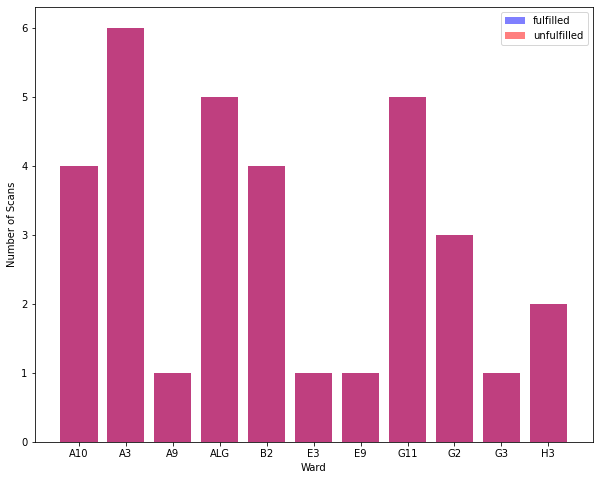

In [47]:
plot_by_quantile_round_day(q2_afternoon_request[39], q2_afternoon_unfulfilled[39])

In [48]:
# q1 morning

for i in range(1, 41):
    plot_by_quantile_round_day(q1_morning_request[i], q1_morning_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q1/morning/day{i}.jpg")
    plt.close()

In [49]:
# q1 afternoon

for i in range(1, 41):
    plot_by_quantile_round_day(q1_afternoon_request[i], q1_afternoon_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q1/afternoon/day{i}.jpg")
    plt.close()

In [50]:
# q1 evening

for i in range(1, 41):
    plot_by_quantile_round_day(q1_evening_request[i], q1_evening_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q1/evening/day{i}.jpg")
    plt.close()

In [51]:
# q1 night

for i in range(1, 41):
    plot_by_quantile_round_day(q1_night_request[i], q1_night_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q1/night/day{i}.jpg")
    plt.close()

In [52]:
# q2 morning

for i in range(1, 41):
    plot_by_quantile_round_day(q2_morning_request[i], q2_morning_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q2/morning/day{i}.jpg")
    plt.close()

In [53]:
# q2 afternoon

for i in range(1, 41):
    plot_by_quantile_round_day(q2_afternoon_request[i], q2_afternoon_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q2/afternoon/day{i}.jpg")
    plt.close()

In [54]:
# q2 evening

for i in range(1, 41):
    plot_by_quantile_round_day(q2_evening_request[i], q2_evening_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q2/evening/day{i}.jpg")
    plt.close()

In [55]:
# q2 night

for i in range(1, 41):
    plot_by_quantile_round_day(q2_night_request[i], q2_night_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q2/night/day{i}.jpg")
    plt.close()

In [56]:
# q3 morning

for i in range(1, 41):
    plot_by_quantile_round_day(q3_morning_request[i], q3_morning_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q3/morning/day{i}.jpg")
    plt.close()

In [57]:
# q3 afternoon

for i in range(1, 41):
    plot_by_quantile_round_day(q3_afternoon_request[i], q3_afternoon_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q3/afternoon/day{i}.jpg")
    plt.close()

In [58]:
# q3 evening

for i in range(1, 41):
    plot_by_quantile_round_day(q3_evening_request[i], q3_evening_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q3/evening/day{i}.jpg")
    plt.close()

In [59]:
# q3 night

for i in range(1, 41):
    plot_by_quantile_round_day(q3_night_request[i], q3_night_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q3/night/day{i}.jpg")
    plt.close()

In [60]:
# q4 morning

for i in range(1, 41):
    plot_by_quantile_round_day(q4_morning_request[i], q4_morning_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q4/morning/day{i}.jpg")
    plt.close()

In [61]:
# q4 afternoon

for i in range(1, 41):
    plot_by_quantile_round_day(q4_afternoon_request[i], q4_afternoon_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q4/afternoon/day{i}.jpg")
    plt.close()

In [62]:
# q4 evening

for i in range(1, 41):
    plot_by_quantile_round_day(q4_evening_request[i], q4_evening_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q4/evening/day{i}.jpg")
    plt.close()

In [63]:
# q4 night

for i in range(1, 41):
    plot_by_quantile_round_day(q4_night_request[i], q4_night_unfulfilled[i], 1)
    plt.savefig(f"results/sim3/ward requests based on request probability/q4/night/day{i}.jpg")
    plt.close()

# visualize fulfilled requests ratio in each quantile

In [64]:
def fulfilled_requests_ratio_by_quantile(ratio_list):
    x = list(range(1, len(ratio_list) + 1))
    
    plt.figure(figsize = [10,8])
    
    plt.plot(x, ratio_list, marker = 'o')
    
    plt.xlabel('Day')
    plt.ylabel('Fulfilled Ratio')
    plt.title('Fulfilled Ratio by Quantile')

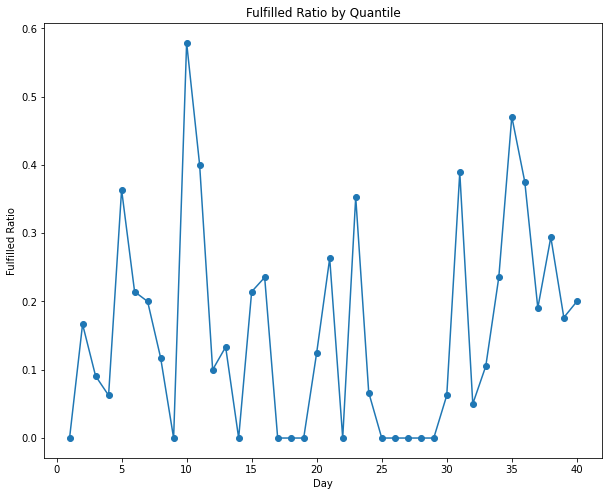

In [65]:
# q1 morning

q1_morning_ratio = []

for i in range(1, 41):
    q1_morning_ratio.append((q1_morning_request[i]['Number of Scans'].sum() - \
                             q1_morning_unfulfilled[i]['Number of Scans'].sum()) / \
                            q1_morning_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q1_morning_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/morning/q1_morning.jpg')

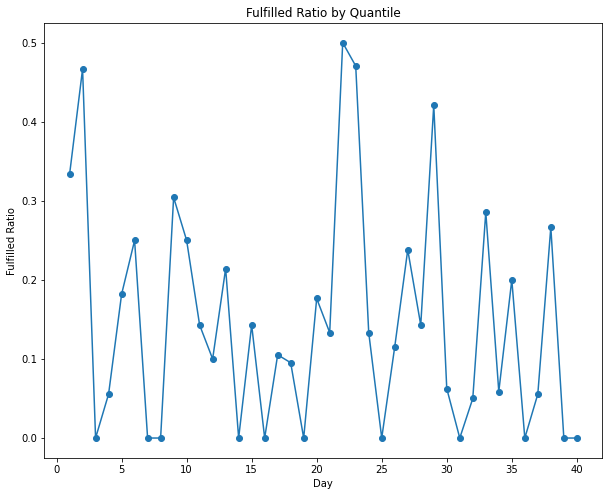

In [66]:
# q1 afternoon

q1_afternoon_ratio = []

for i in range(1, 41):
    q1_afternoon_ratio.append((q1_afternoon_request[i]['Number of Scans'].sum() - \
                               q1_afternoon_unfulfilled[i]['Number of Scans'].sum()) / \
                              q1_afternoon_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q1_afternoon_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/afternoon/q1_afternoon.jpg')

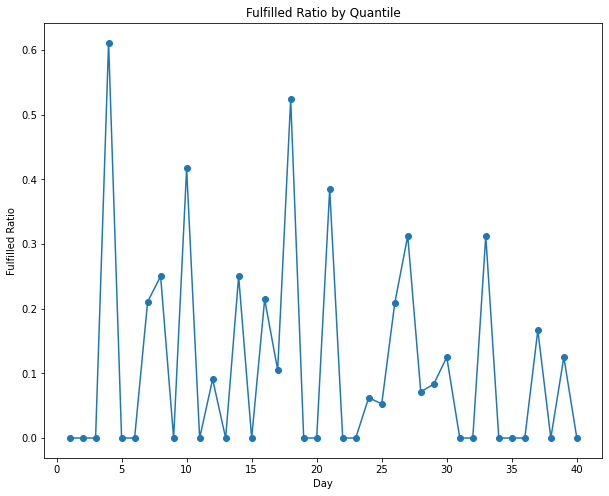

In [67]:
# q1 evening

q1_evening_ratio = []

for i in range(1, 41):
    q1_evening_ratio.append((q1_evening_request[i]['Number of Scans'].sum() - \
                             q1_evening_unfulfilled[i]['Number of Scans'].sum()) / \
                            q1_evening_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q1_evening_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/evening/q1_evening.jpg')

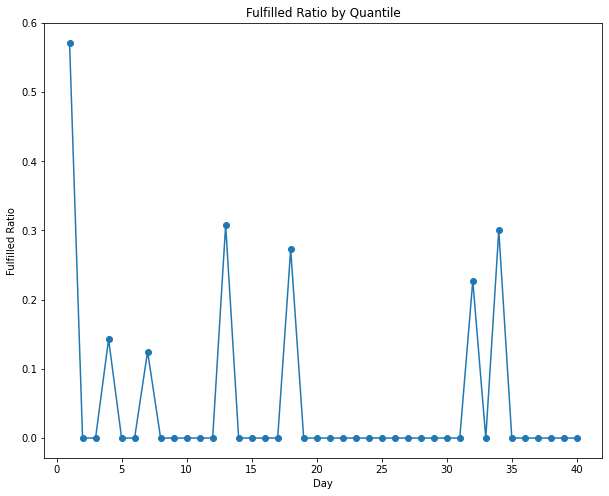

In [68]:
# q1 night

q1_night_ratio = []

for i in range(1, 41):
    q1_night_ratio.append((q1_night_request[i]['Number of Scans'].sum() - \
                           q1_night_unfulfilled[i]['Number of Scans'].sum()) / \
                          q1_night_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q1_night_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/night/q1_night.jpg')

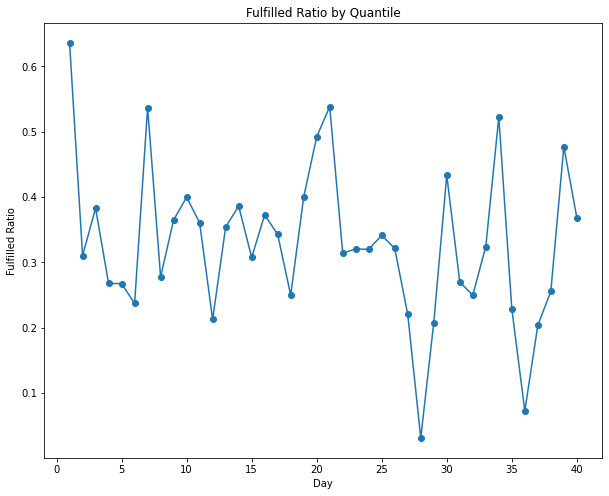

In [69]:
# q2 morning

q2_morning_ratio = []

for i in range(1, 41):
    q2_morning_ratio.append((q2_morning_request[i]['Number of Scans'].sum() - \
                             q2_morning_unfulfilled[i]['Number of Scans'].sum()) / \
                            q2_morning_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q2_morning_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/morning/q2_morning.jpg')

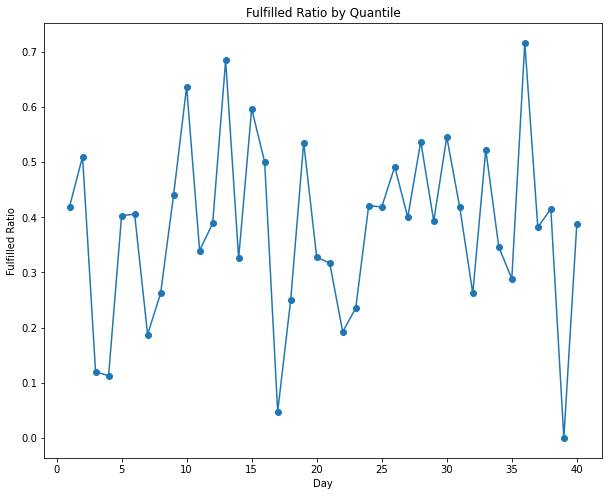

In [70]:
# q2 afternoon

q2_afternoon_ratio = []

for i in range(1, 41):
    q2_afternoon_ratio.append((q2_afternoon_request[i]['Number of Scans'].sum() - \
                               q2_afternoon_unfulfilled[i]['Number of Scans'].sum()) / \
                              q2_afternoon_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q2_afternoon_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/afternoon/q2_afternoon.jpg')

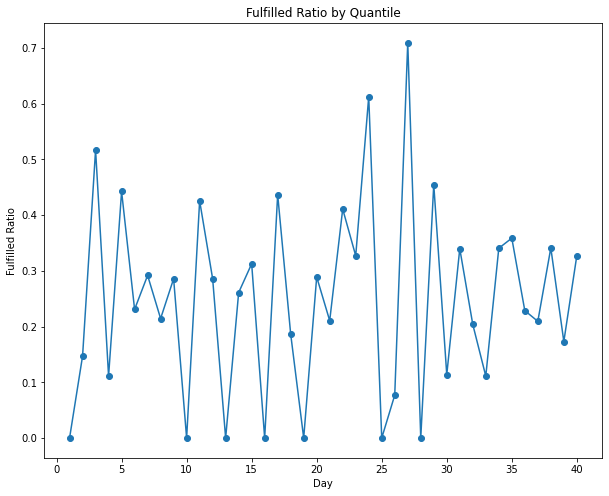

In [71]:
# q2 evening

q2_evening_ratio = []

for i in range(1, 41):
    q2_evening_ratio.append((q2_evening_request[i]['Number of Scans'].sum() - \
                             q2_evening_unfulfilled[i]['Number of Scans'].sum()) / \
                            q2_evening_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q2_evening_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/evening/q2_evening.jpg')

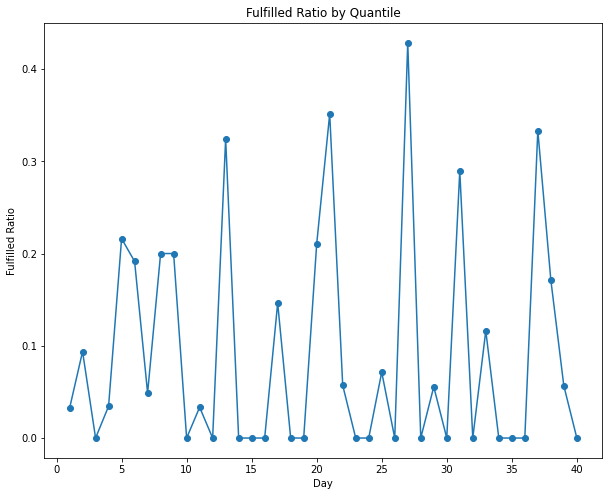

In [72]:
# q2 night

q2_night_ratio = []

for i in range(1, 41):
    q2_night_ratio.append((q2_night_request[i]['Number of Scans'].sum() - \
                           q2_night_unfulfilled[i]['Number of Scans'].sum()) / \
                          q2_night_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q2_night_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/night/q2_night.jpg')

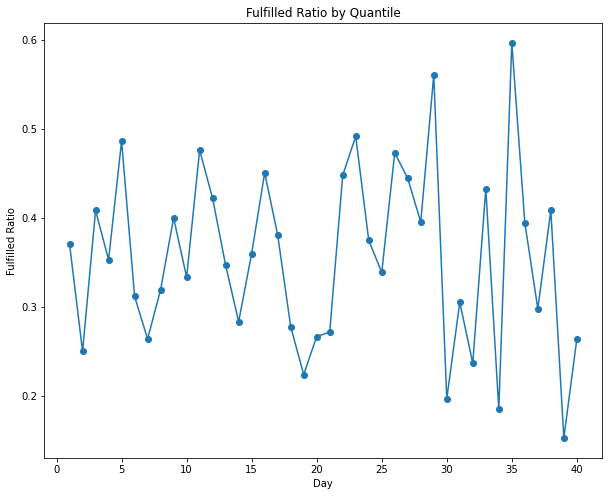

In [73]:
# q3 morning

q3_morning_ratio = []

for i in range(1, 41):
    q3_morning_ratio.append((q3_morning_request[i]['Number of Scans'].sum() - \
                             q3_morning_unfulfilled[i]['Number of Scans'].sum()) / \
                            q3_morning_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q3_morning_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/morning/q3_morning.jpg')

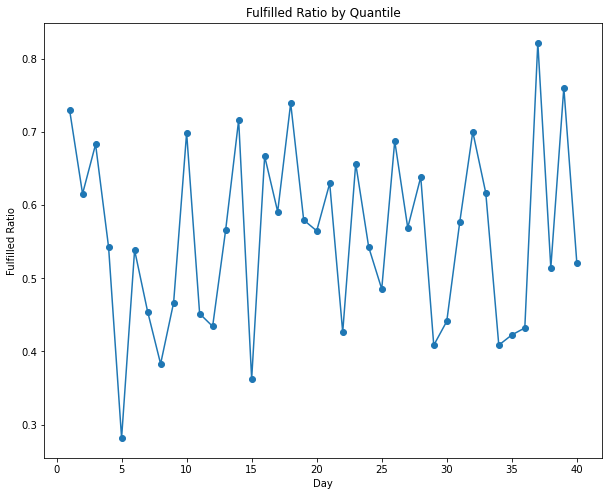

In [74]:
# q3 afternoon

q3_afternoon_ratio = []

for i in range(1, 41):
    q3_afternoon_ratio.append((q3_afternoon_request[i]['Number of Scans'].sum() - \
                               q3_afternoon_unfulfilled[i]['Number of Scans'].sum()) / \
                              q3_afternoon_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q3_afternoon_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/afternoon/q3_afternoon.jpg')

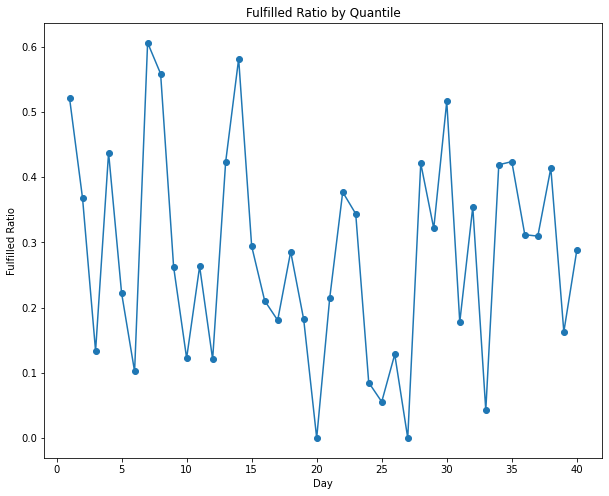

In [75]:
# q3 evening

q3_evening_ratio = []

for i in range(1, 41):
    q3_evening_ratio.append((q3_evening_request[i]['Number of Scans'].sum() - \
                             q3_evening_unfulfilled[i]['Number of Scans'].sum()) / \
                            q3_evening_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q3_evening_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/evening/q3_evening.jpg')

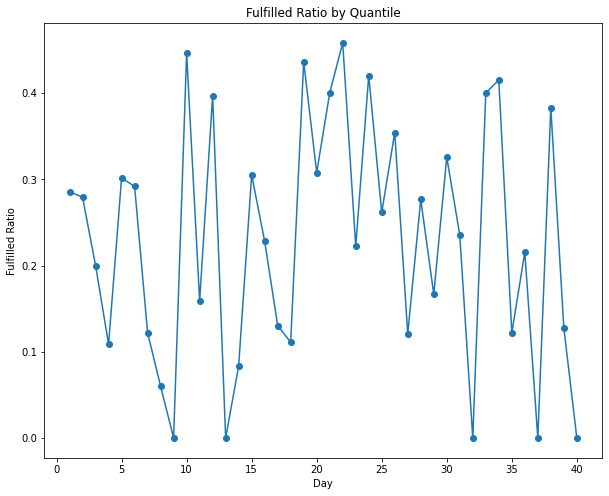

In [76]:
# q3 night

q3_night_ratio = []

for i in range(1, 41):
    q3_night_ratio.append((q3_night_request[i]['Number of Scans'].sum() - \
                           q3_night_unfulfilled[i]['Number of Scans'].sum()) / \
                          q3_night_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q3_night_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/night/q3_night.jpg')

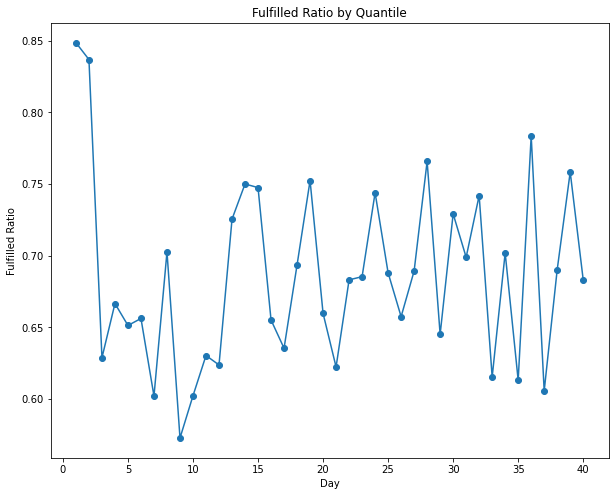

In [77]:
# q4 morning

q4_morning_ratio = []

for i in range(1, 41):
    q4_morning_ratio.append((q4_morning_request[i]['Number of Scans'].sum() - \
                             q4_morning_unfulfilled[i]['Number of Scans'].sum()) / \
                            q4_morning_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q4_morning_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/morning/q4_morning.jpg')

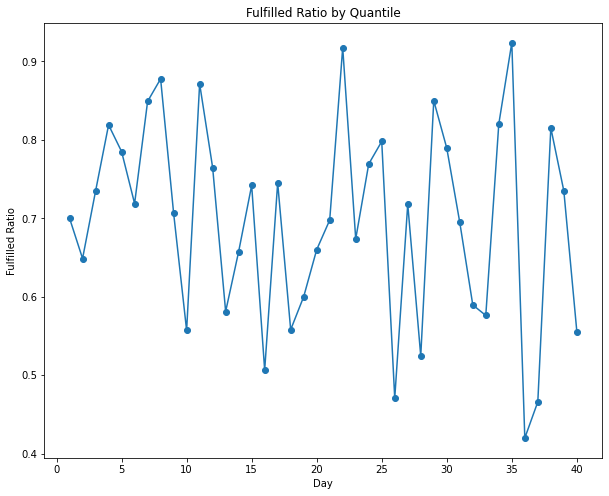

In [78]:
# q4 afternoon

q4_afternoon_ratio = []

for i in range(1, 41):
    q4_afternoon_ratio.append((q4_afternoon_request[i]['Number of Scans'].sum() - \
                               q4_afternoon_unfulfilled[i]['Number of Scans'].sum()) / \
                              q4_afternoon_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q4_afternoon_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/afternoon/q4_afternoon.jpg')

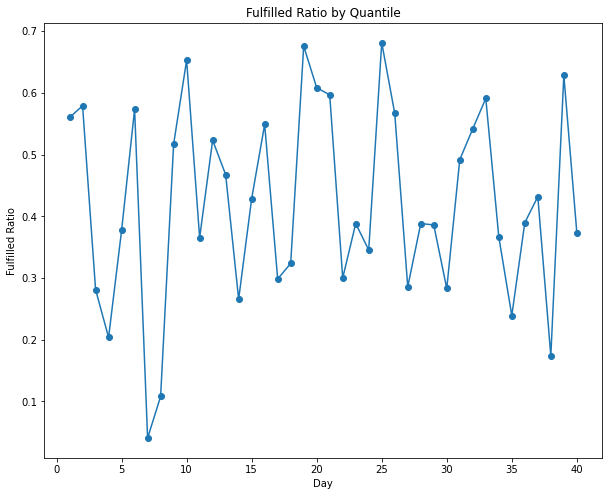

In [79]:
# q4 evening

q4_evening_ratio = []

for i in range(1, 41):
    q4_evening_ratio.append((q4_evening_request[i]['Number of Scans'].sum() - \
                             q4_evening_unfulfilled[i]['Number of Scans'].sum()) / \
                            q4_evening_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q4_evening_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/evening/q4_evening.jpg')

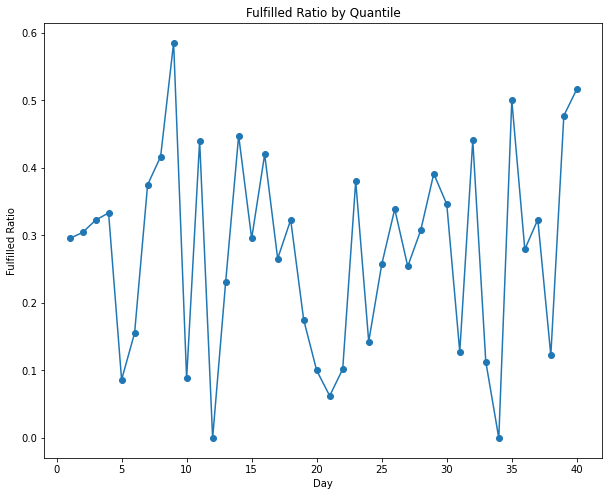

In [80]:
# q4 night

q4_night_ratio = []

for i in range(1, 41):
    q4_night_ratio.append((q4_night_request[i]['Number of Scans'].sum() - \
                           q4_night_unfulfilled[i]['Number of Scans'].sum()) / \
                          q4_night_request[i]['Number of Scans'].sum())

fulfilled_requests_ratio_by_quantile(q4_night_ratio)
plt.savefig('results/sim3/fulfilled ratio by quantile/night/q4_night.jpg')

# visualize unfulfilled requests in wards at the end of the day (night)

In [81]:
def plot_by_unfulfillled_ward(ward):
    import matplotlib.pyplot as plt
    import numpy as np
    
    unfulfilled = []
    quantile = 0
    
    for i in range(len(q1_morning_request)):
        try:
            unfulfilled.append(q1_night_unfulfilled[i+1][q1_night_unfulfilled[i+1]['Ward'] == ward]['Number of Scans'].tolist()[0])
            quantile = 1
        except:
            try:
                unfulfilled.append(q2_night_unfulfilled[i+1][q2_night_unfulfilled[i+1]['Ward'] == ward]['Number of Scans'].tolist()[0])
                quantile = 2
            except:
                try:
                    unfulfilled.append(q3_night_unfulfilled[i+1][q3_night_unfulfilled[i+1]['Ward'] == ward]['Number of Scans'].tolist()[0])
                    quantile = 3
                except:
                    try:
                        unfulfilled.append(q4_night_unfulfilled[i+1][q4_night_unfulfilled[i+1]['Ward'] == ward]['Number of Scans'].tolist()[0])
                        quantile = 4
                    except:
                        unfulfilled.append(0)
                        
    average = np.mean(unfulfilled)
    # sd = np.std(unfulfilled)
            
    x_pos = [i for i, _ in enumerate(unfulfilled)]
    
    plt.figure(figsize = [10,8])
    
    plt.bar(x_pos, unfulfilled)
    
    plt.axhline(y = average, color = 'r', linestyle = 'dashed', label = 'Average')
    
    plt.text(42, average, 'Avg: {:.2f}'.format(average), color = 'r')
    # plt.text(42, average + sd, 'Std: {:.2f}'.format(sd), color = 'r')
    
    plt.xlabel('Simulation Day')
    plt.ylabel('Unfulfilled Requests')
    plt.title(f"Ward {ward} unfulfilled requests by the end of day\n(Ward {ward} is in Q{quantile})")
    
    plt.plot

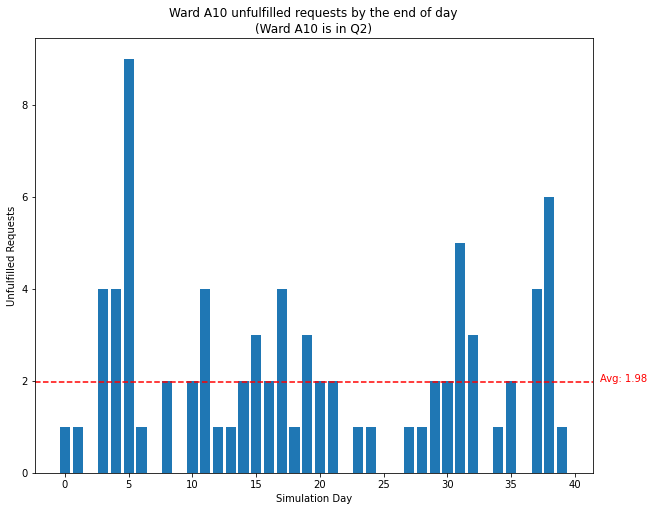

In [82]:
plot_by_unfulfillled_ward("A10")

In [83]:
for i in ward_list:
    plot_by_unfulfillled_ward(i)
    plt.savefig(f"results/sim3/unfulfilled requests by ward/{i}.jpg")
    plt.close()

# visualize total & unfulfilled requests by each round

In [84]:
import matplotlib.pyplot as plt

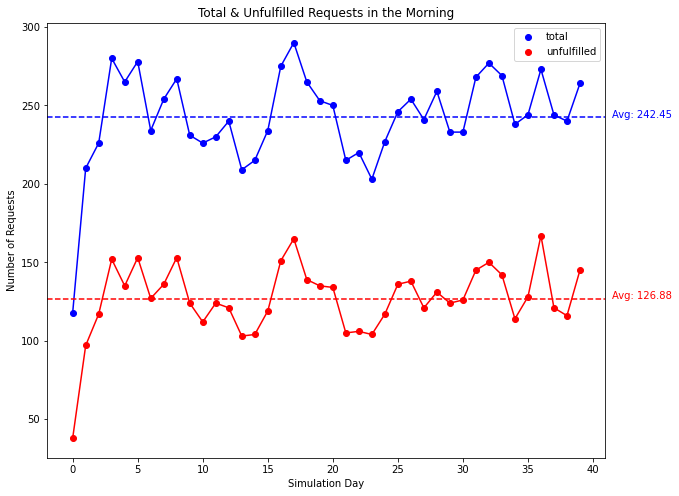

In [85]:
# morning
x_pos = [i for i, _ in enumerate(morning_request_number)]

plt.figure(figsize = [10,8])

average_total = np.mean(morning_request_number)
average_unfulfilled = np.mean(morning_unfulfilled_number)

# sd_total = np.std(morning_request_number)
# sd_unfulfilled = np.mean(morning_unfulfilled_number)

plt.scatter(x_pos, morning_request_number, color = 'b', label = 'total')
plt.scatter(x_pos, morning_unfulfilled_number, color = 'r', label = 'unfulfilled')

plt.plot(x_pos, morning_request_number, color = 'b')
plt.plot(x_pos, morning_unfulfilled_number, color = 'r')

plt.axhline(y = average_total, color = 'b', linestyle = 'dashed')
plt.axhline(y = average_unfulfilled, color = 'r', linestyle = 'dashed')

plt.text(41.5, average_total, 'Avg: {:.2f}'.format(average_total), color = 'b')
plt.text(41.5, average_unfulfilled, 'Avg: {:.2f}'.format(average_unfulfilled), color = 'r')

# plt.text(41.5, average_total + sd_total, 'Std:{:.2f}'.format(sd_total), color = 'b')
# plt.text(41.5, average_unfulfilled + sd_unfulfilled, 'Std:{:.2f}'.format(sd_unfulfilled), color = 'r')

plt.xlabel('Simulation Day')
plt.ylabel('Number of Requests')
plt.legend()
plt.title("Total & Unfulfilled Requests in the Morning")

plt.savefig('results/sim3/requests by round/morning.jpg')

plt.show()

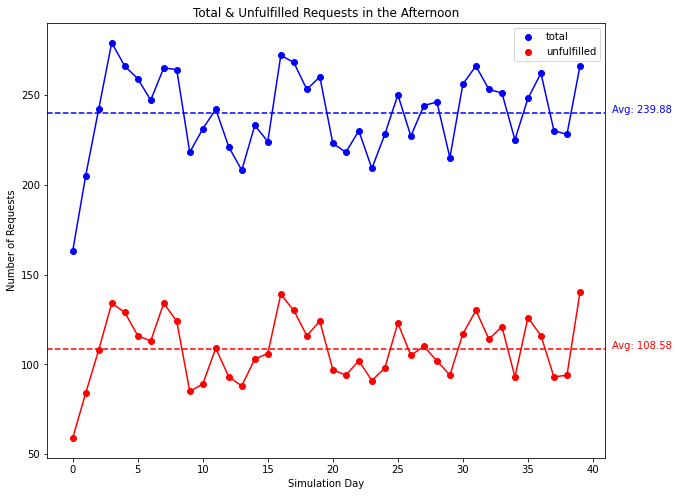

In [86]:
# afternoon
x_pos = [i for i, _ in enumerate(afternoon_request_number)]

plt.figure(figsize = [10,8])

average_total = np.mean(afternoon_request_number)
average_unfulfilled = np.mean(afternoon_unfulfilled_number)

plt.scatter(x_pos, afternoon_request_number, color = 'b', label = 'total')
plt.scatter(x_pos, afternoon_unfulfilled_number, color = 'r', label = 'unfulfilled')

plt.plot(x_pos, afternoon_request_number, color = 'b')
plt.plot(x_pos, afternoon_unfulfilled_number, color = 'r')

plt.axhline(y = average_total, color = 'b', linestyle = 'dashed')
plt.axhline(y = average_unfulfilled, color = 'r', linestyle = 'dashed')

plt.text(41.5, average_total, 'Avg: {:.2f}'.format(average_total), color = 'b')
plt.text(41.5, average_unfulfilled, 'Avg: {:.2f}'.format(average_unfulfilled), color = 'r')

plt.xlabel('Simulation Day')
plt.ylabel('Number of Requests')
plt.legend()
plt.title("Total & Unfulfilled Requests in the Afternoon")

plt.savefig('results/sim3/requests by round/afternoon.jpg')

plt.show()

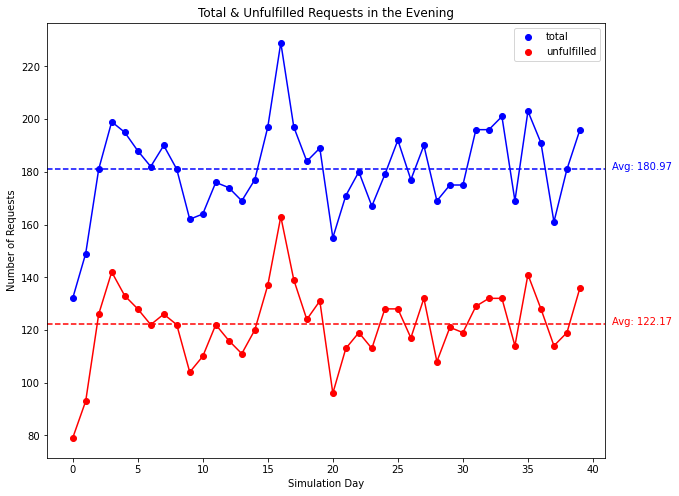

In [87]:
# evening
x_pos = [i for i, _ in enumerate(evening_request_number)]

plt.figure(figsize = [10,8])

average_total = np.mean(evening_request_number)
average_unfulfilled = np.mean(evening_unfulfilled_number)

plt.scatter(x_pos, evening_request_number, color = 'b', label = 'total')
plt.scatter(x_pos, evening_unfulfilled_number, color = 'r', label = 'unfulfilled')

plt.plot(x_pos, evening_request_number, color = 'b')
plt.plot(x_pos, evening_unfulfilled_number, color = 'r')

plt.axhline(y = average_total, color = 'b', linestyle = 'dashed')
plt.axhline(y = average_unfulfilled, color = 'r', linestyle = 'dashed')

plt.text(41.5, average_total, 'Avg: {:.2f}'.format(average_total), color = 'b')
plt.text(41.5, average_unfulfilled, 'Avg: {:.2f}'.format(average_unfulfilled), color = 'r')

plt.xlabel('Simulation Day')
plt.ylabel('Number of Requests')
plt.legend()
plt.title("Total & Unfulfilled Requests in the Evening")

plt.savefig('results/sim3/requests by round/evening.jpg')

plt.show()

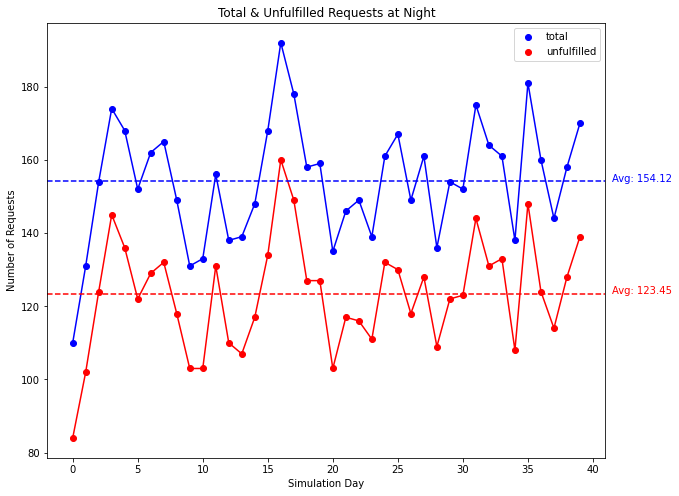

In [88]:
# night
x_pos = [i for i, _ in enumerate(night_request_number)]

plt.figure(figsize = [10,8])

average_total = np.mean(night_request_number)
average_unfulfilled = np.mean(night_unfulfilled_number)

plt.scatter(x_pos, night_request_number, color = 'b', label = 'total')
plt.scatter(x_pos, night_unfulfilled_number, color = 'r', label = 'unfulfilled')

plt.plot(x_pos, night_request_number, color = 'b')
plt.plot(x_pos, night_unfulfilled_number, color = 'r')

plt.axhline(y = average_total, color = 'b', linestyle = 'dashed')
plt.axhline(y = average_unfulfilled, color = 'r', linestyle = 'dashed')

plt.text(41.5, average_total, 'Avg: {:.2f}'.format(average_total), color = 'b')
plt.text(41.5, average_unfulfilled, 'Avg: {:.2f}'.format(average_unfulfilled), color = 'r')

plt.xlabel('Simulation Day')
plt.ylabel('Number of Requests')
plt.legend()
plt.title("Total & Unfulfilled Requests at Night")

plt.savefig('results/sim3/requests by round/night.jpg')

plt.show()

# demand & supply in each region

In [89]:
def demand_supply_by_region(total, fulfilled):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize = [10,8])
    
    average_total = np.mean(list(total.values()))
    average_fulfilled = np.mean(list(fulfilled.values()))

    plt.scatter(list(total.keys()), list(total.values()), color = 'b', label = 'total')
    plt.scatter(list(fulfilled.keys()), list(fulfilled.values()), color = 'r', label = 'fulfilled')
    
    plt.plot(list(total.keys()), list(total.values()), color = 'b')
    plt.plot(list(fulfilled.keys()), list(fulfilled.values()), color = 'r')
    
    plt.axhline(y = average_total, color = 'b', linestyle = 'dashed')
    plt.axhline(y = average_fulfilled, color = 'k', linestyle = 'dashed')

    plt.text(42.5, average_total, 'Avg: {:.2f}'.format(average_total), color = 'b')
    plt.text(42.5, average_fulfilled, 'Avg: {:.2f}'.format(average_fulfilled), color = 'r')
    
    plt.xlabel("Simulation Days")
    plt.ylabel("Number of Requests")
    plt.title("Demand & Supply by Region")
    plt.legend()
    
    plt.plot()

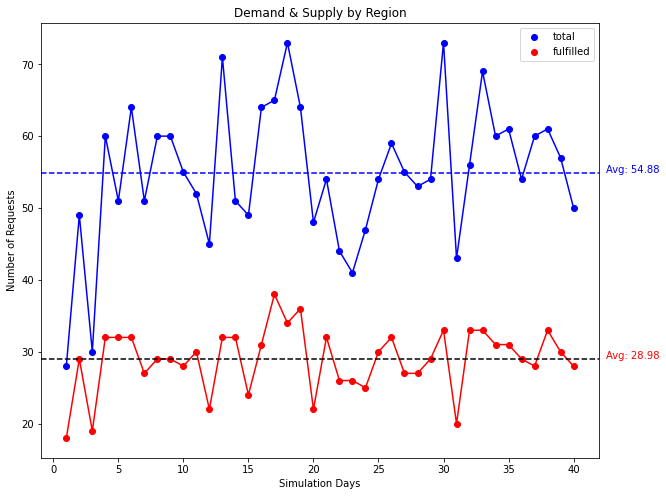

In [90]:
demand_supply_by_region(morning_region1_total, morning_region1_fulfilled)
plt.savefig('results/sim3/d&s by region/morning/region1.jpg')
# plt.close()

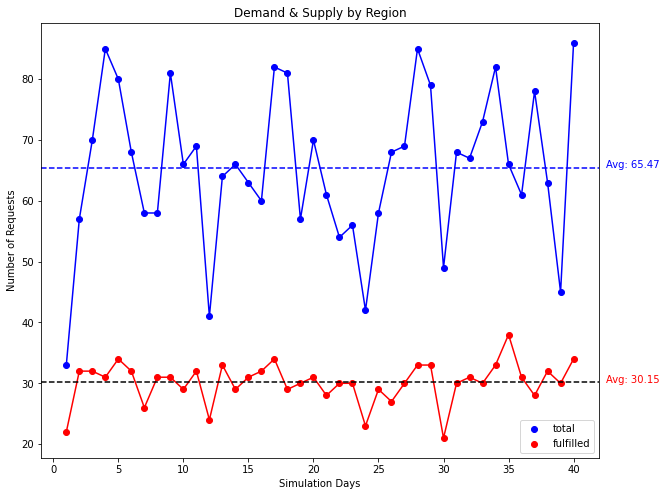

In [91]:
demand_supply_by_region(morning_region2_total, morning_region2_fulfilled)
plt.savefig('results/sim3/d&s by region/morning/region2.jpg')
# plt.close()

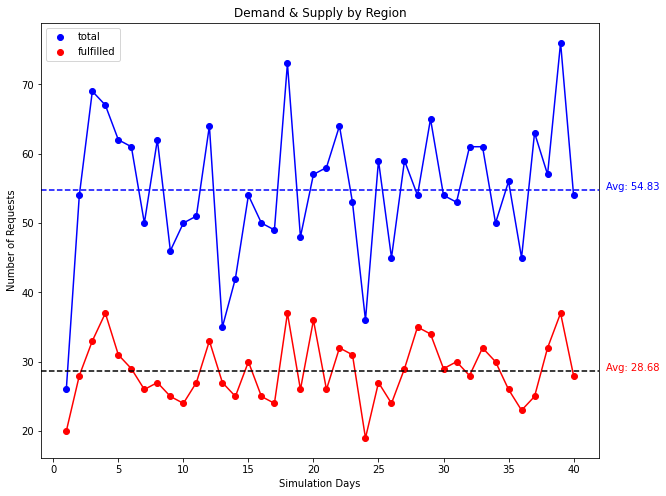

In [92]:
demand_supply_by_region(morning_region3_total, morning_region3_fulfilled)
plt.savefig('results/sim3/d&s by region/morning/region3.jpg')
# plt.close()

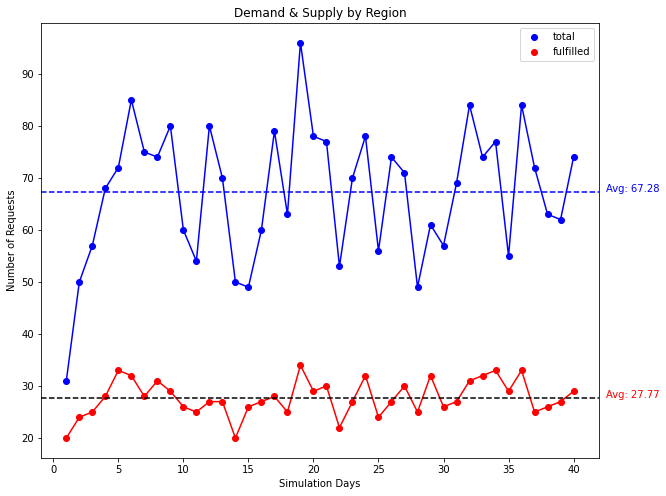

In [93]:
demand_supply_by_region(morning_region4_total, morning_region4_fulfilled)
plt.savefig('results/sim3/d&s by region/morning/region4.jpg')
# plt.close()

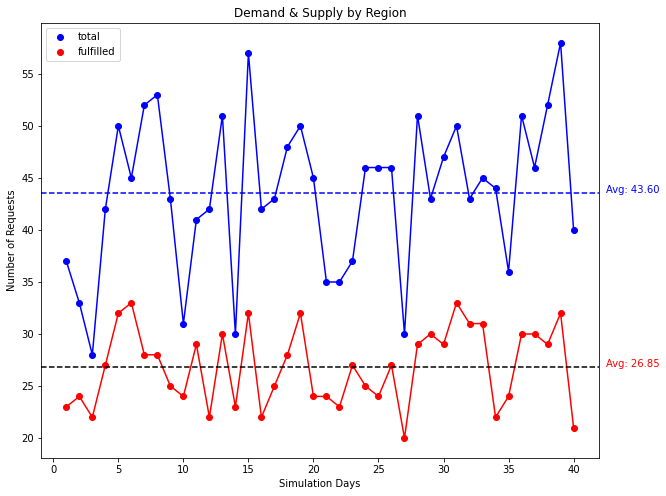

In [94]:
demand_supply_by_region(afternoon_region1_total, afternoon_region1_fulfilled)
plt.savefig('results/sim3/d&s by region/afternoon/region1.jpg')
# plt.close()

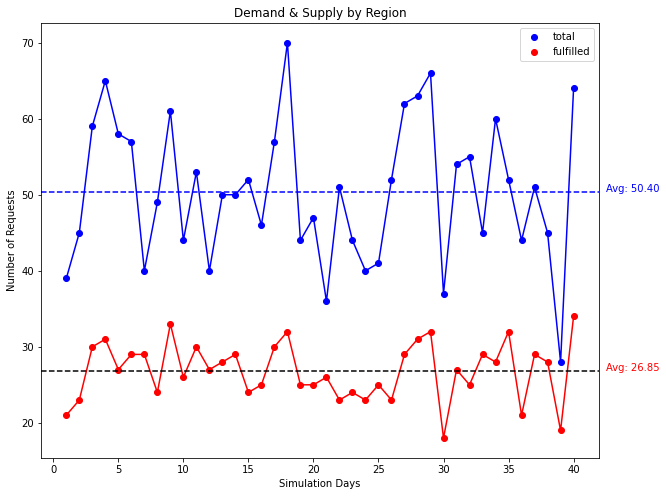

In [95]:
demand_supply_by_region(afternoon_region2_total, afternoon_region2_fulfilled)
plt.savefig('results/sim3/d&s by region/afternoon/region2.jpg')
# plt.close()

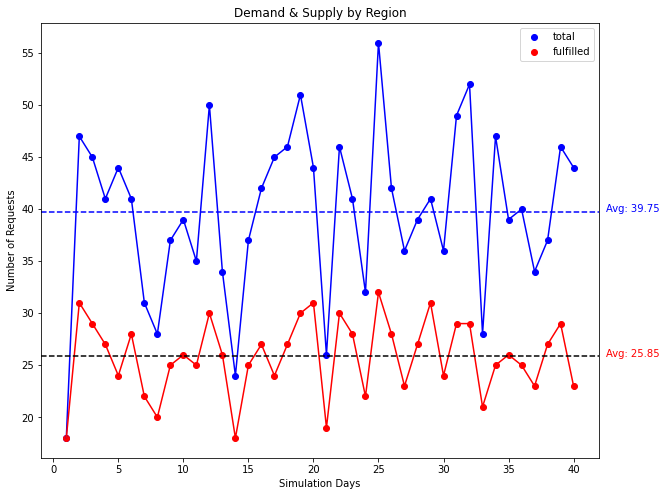

In [96]:
demand_supply_by_region(afternoon_region3_total, afternoon_region3_fulfilled)
plt.savefig('results/sim3/d&s by region/afternoon/region3.jpg')
# plt.close()

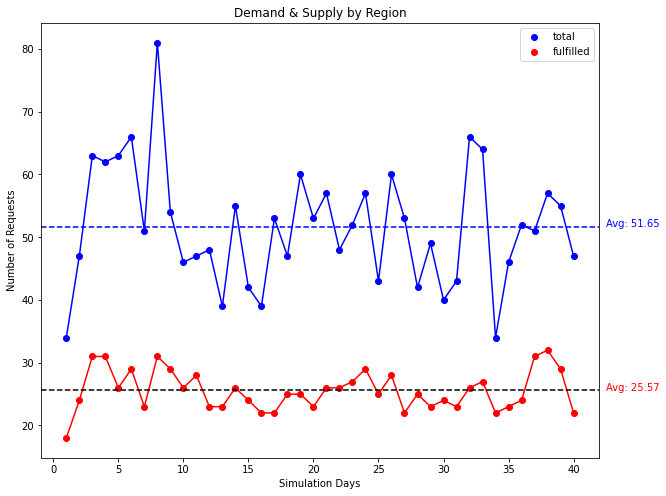

In [97]:
demand_supply_by_region(afternoon_region4_total, afternoon_region4_fulfilled)
plt.savefig('results/sim3/d&s by region/afternoon/region4.jpg')
# plt.close()

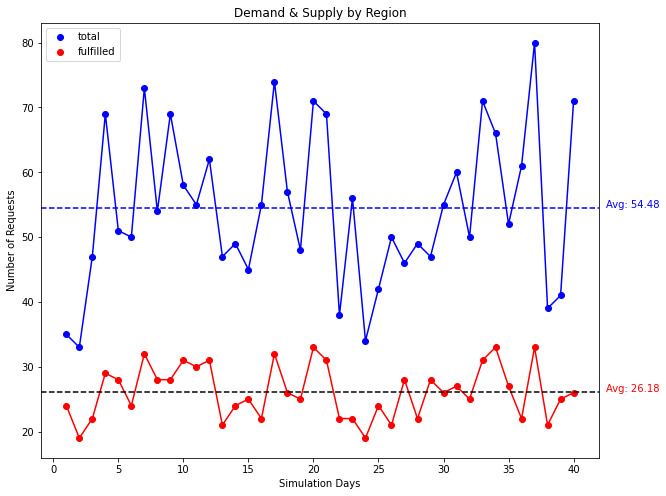

In [98]:
demand_supply_by_region(afternoon_region5_total, afternoon_region5_fulfilled)
plt.savefig('results/sim3/d&s by region/afternoon/region5.jpg')
# plt.close()

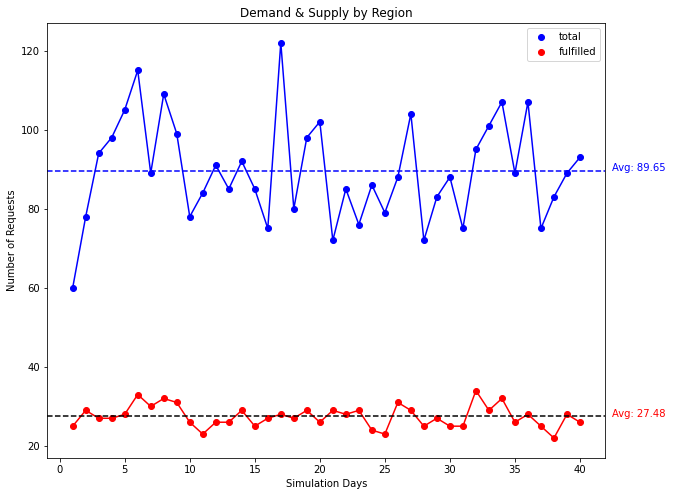

In [99]:
demand_supply_by_region(evening_region1_total, evening_region1_fulfilled)
plt.savefig('results/sim3/d&s by region/evening/region1.jpg')
# plt.close()

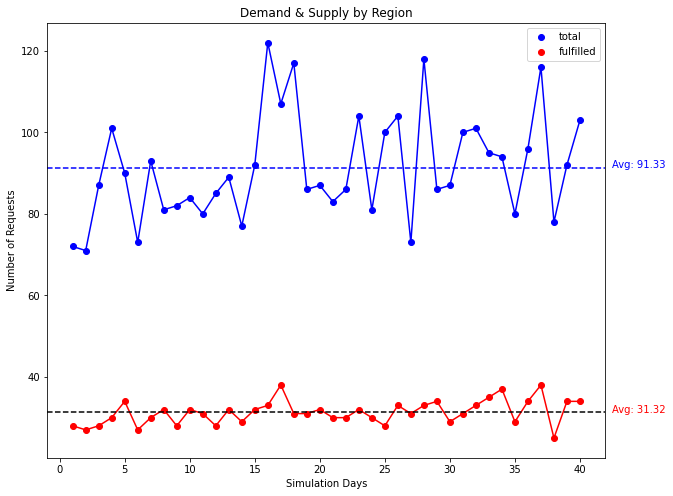

In [100]:
demand_supply_by_region(evening_region2_total, evening_region2_fulfilled)
plt.savefig('results/sim3/d&s by region/evening/region2.jpg')
# plt.close()

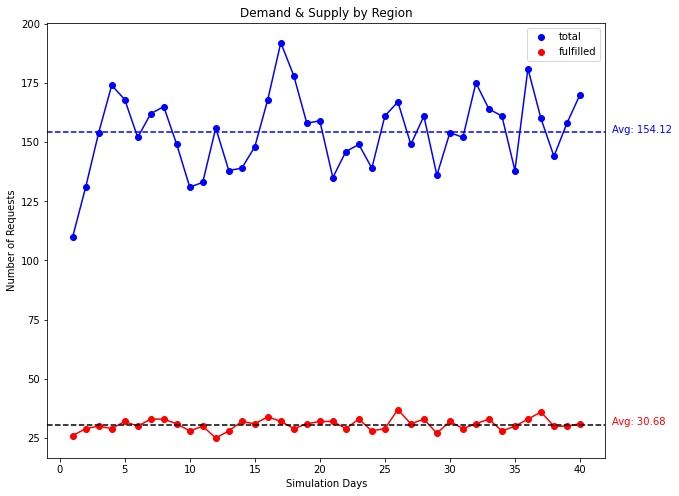

In [101]:
demand_supply_by_region(night_region1_total, night_region1_fulfilled)
plt.savefig('results/sim3/d&s by region/night/region1.jpg')
# plt.close()

# visualize run time

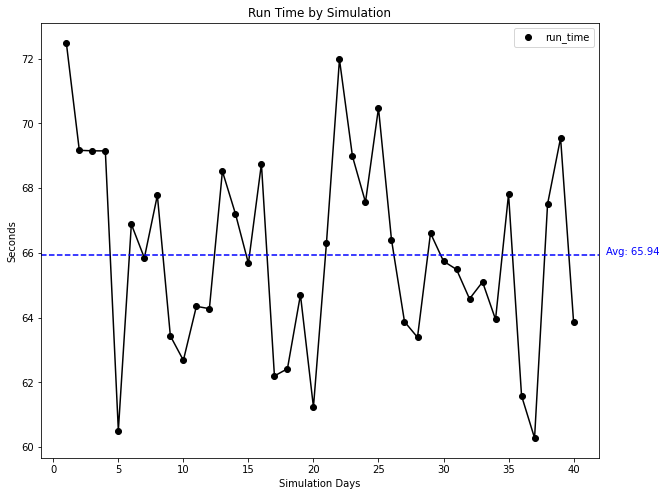

In [102]:
plt.figure(figsize = [10,8])

average = np.mean(list(run_time.values()))

plt.scatter(list(run_time.keys()), list(run_time.values()), color = 'k', label = 'run_time')

plt.plot(list(run_time.keys()), list(run_time.values()), color = 'k')

plt.axhline(y = average, color = 'b', linestyle = 'dashed')

plt.text(42.5, average, 'Avg: {:.2f}'.format(average), color = 'b')

plt.xlabel("Simulation Days")
plt.ylabel("Seconds")
plt.title("Run Time by Simulation")
plt.legend()

plt.savefig('results/sim3/run time/run time.jpg')
# plt.close()